In [1]:
#Used to access function like ML, Deep Learning, NLP. 
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#eXtreme Gradient Boosting to perform SUPERVISED LEARNING
pip install xgboost

     --------------------------------------- 99.8/99.8 MB 12.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
from keras.layers import Dense
import tensorflow.keras as keras
from keras.models import Sequential
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd, numpy as np, os, xgboost as xgb, seaborn as sns

C:\Users\anxiousviking\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Acessing the directory path
dir_path = r'C:\Users\anxiousviking\Downloads\final aml'

In [3]:
#Reading CSV and storing it DATAFRAME
labels = pd.read_csv("train_labels.csv")

In [4]:
# Read the data
labels = dd.read_csv("train_labels.csv")

# Select a random 20% sample from the dataframe
labels_sample = labels.sample(frac = 0.20, random_state = 42)

# Compute the results
labels_sample = labels_sample.compute()


In [5]:
# Read the data
train_data = dd.read_csv("train_data.csv")

# Compute the results
train_data = train_data.compute()

#print(train_data)

In [6]:
# Merge the sample with the test_data dataframe
final_data = pd.merge(labels_sample, train_data, on='customer_ID')

print(final_data)

                                               customer_ID  target  \
0        e8fb62c8f4ca64247de8c54c2e9649cfd9fc952979675e...       0   
1        e8fb62c8f4ca64247de8c54c2e9649cfd9fc952979675e...       0   
2        e8fb62c8f4ca64247de8c54c2e9649cfd9fc952979675e...       0   
3        e8fb62c8f4ca64247de8c54c2e9649cfd9fc952979675e...       0   
4        e8fb62c8f4ca64247de8c54c2e9649cfd9fc952979675e...       0   
...                                                    ...     ...   
1106494  443c39eb5a5b9dda086f28a8644305d96b767d5b3185f4...       0   
1106495  443c39eb5a5b9dda086f28a8644305d96b767d5b3185f4...       0   
1106496  443c39eb5a5b9dda086f28a8644305d96b767d5b3185f4...       0   
1106497  443c39eb5a5b9dda086f28a8644305d96b767d5b3185f4...       0   
1106498  443c39eb5a5b9dda086f28a8644305d96b767d5b3185f4...       0   

                S_2       P_2      D_39       B_1       B_2       R_1  \
0        2017-03-31  0.867003  0.001099  0.003429  0.811694  0.003724   
1        2017

In [7]:
# Save the DataFrame to a CSV file
final_data.to_csv('final_data.csv', index=False)

##################################################################

In [10]:
#Reading CSV and storing it DATAFRAME
final_data = pd.read_csv("final_data.csv")

In [9]:
#Printing the final data set after extraction
print(final_data)

                                               customer_ID  target  \
0        e8fb62c8f4ca64247de8c54c2e9649cfd9fc952979675e...       0   
1        e8fb62c8f4ca64247de8c54c2e9649cfd9fc952979675e...       0   
2        e8fb62c8f4ca64247de8c54c2e9649cfd9fc952979675e...       0   
3        e8fb62c8f4ca64247de8c54c2e9649cfd9fc952979675e...       0   
4        e8fb62c8f4ca64247de8c54c2e9649cfd9fc952979675e...       0   
...                                                    ...     ...   
1106494  443c39eb5a5b9dda086f28a8644305d96b767d5b3185f4...       0   
1106495  443c39eb5a5b9dda086f28a8644305d96b767d5b3185f4...       0   
1106496  443c39eb5a5b9dda086f28a8644305d96b767d5b3185f4...       0   
1106497  443c39eb5a5b9dda086f28a8644305d96b767d5b3185f4...       0   
1106498  443c39eb5a5b9dda086f28a8644305d96b767d5b3185f4...       0   

                S_2       P_2      D_39       B_1       B_2       R_1  \
0        2017-03-31  0.867003  0.001099  0.003429  0.811694  0.003724   
1        2017

In [10]:
# Print the column names of the DataFrame
print(final_data.columns)

Index(['customer_ID', 'target', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1',
       'S_3', 'D_41',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=191)


In [11]:
# Print the data types of the DataFrame's columns
print(final_data.dtypes)

customer_ID     object
target           int64
S_2             object
P_2            float64
D_39           float64
                ...   
D_141          float64
D_142          float64
D_143          float64
D_144          float64
D_145          float64
Length: 191, dtype: object


In [12]:
# Convert date_range_max to datetime and finding the MAXIMUM DATE AND DATE_TIME
date_range_max = pd.to_datetime(final_data['S_2'].max())

In [13]:
#Group by CUSTOMER ID
customer_data = final_data.groupby('customer_ID')['target'].agg(['count', 'mean']).reset_index()
customer_data.columns = ['customer_ID', 'Months_of_Data', 'Default_Rate']

#Calculating DEFAULT RATE
customer_data['Default_Rate'] = customer_data['Default_Rate'] * 100
customer_count_by_months = customer_data['Months_of_Data'].value_counts().reset_index()
customer_count_by_months.columns = ['Months_of_Data', 'Customer_Count']
customer_count_by_months = customer_count_by_months.sort_values(by='Months_of_Data')
print(customer_count_by_months)

#Finding the MAXIMUM Date 
date_range_max = final_data['S_2'].max()
results_df = pd.DataFrame(columns=['Months', 'Observations', 'Default Rate', 'Default Rate Percentage'])
for months_range in range(1, 14):
    start_date = date_range_max - pd.DateOffset(months=months_range - 1)
    filtered_df = final_data[final_data['S_2'] >= start_date]
    num_observations = len(filtered_df)
    num_defaults = len(filtered_df[filtered_df['target'] == 1])
    default_rate = num_defaults / num_observations
    default_rate_percentage = default_rate * 100
    results_df = results_df.append({'Months': months_range, 'Observations': num_observations,'Default Rate': default_rate, 'Default Rate Percentage': default_rate_percentage},ignore_index=True)

print(results_df)
final_data['S_2'] = pd.to_datetime(final_data['S_2']) 
end_date = pd.to_datetime('2018-03-31')

counts_by_month = {}
default_rates_by_month = {}


current_date = end_date
month_number = 1 

while current_date >= pd.to_datetime('2017-03-01'):
    start_date = current_date - pd.DateOffset(months=1)
    customers_for_month = final_data[(final_data['S_2'] >= start_date) & (final_data['S_2'] <= current_date)]
    unique_customer_ids_month = customers_for_month['customer_ID'].unique()
    records_before_month = final_data[final_data['S_2'] < start_date]
    unique_customer_ids_before_month = records_before_month['customer_ID'].unique()
    unique_customer_ids_only_in_month = set(unique_customer_ids_month) - set(unique_customer_ids_before_month)
    default_rate = customers_for_month[customers_for_month['customer_ID'].isin(unique_customer_ids_only_in_month)]['target'].mean()
    month_label = current_date.strftime("%B %Y")
    counts_by_month[month_label] = len(unique_customer_ids_only_in_month)
    default_rates_by_month[month_label] = default_rate
    print(month_number, counts_by_month[month_label], default_rates_by_month[month_label])
    month_number = month_number + 1
    current_date -= pd.DateOffset(months=1)

    Months_of_Data  Customer_Count
9                1            1047
4                2            1220
7                3            1126
12               4             900
11               5             954
8                6            1122
10               7            1027
5                8            1219
3                9            1291
2               10            1344
6               11            1138
1               12            2121
0               13           77274


TypeError: unsupported operand type(s) for -: 'str' and 'DateOffset'

In [14]:
print(type(results_df))

<class 'pandas.core.frame.DataFrame'>


In [15]:
final_data["S_2"]=pd.to_datetime(final_data["S_2"])

In [18]:
#pip install pandas --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/61/11/1812ef6cbd7433ad240f72161ce5f84c4c450cede4db080365d371d29117/pandas-2.2.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 777.7 kB/s eta 0:00:15
   - -------------------------------------- 0.3/11.6 MB 3.0 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.6 MB 5.8 MB/s eta 0:00:02
   ------- -------------------------------- 2.2/11.6 MB 10.0 MB/s eta 0:00:01
   -------- ------------------------------- 2.4/11.6 MB 9.7 MB/s eta 0:00:01
   -------- ------------------------------- 2.4/11.6 MB 9.7 MB/s eta 0:00:01
   -------- ------------------------------- 2.4/11.6 MB 9.7 MB/s eta 0:00:01
   ----------- -------------------

## Data Exploring

In [16]:
#Features are divided into 5 categories 
count_D = final_data.columns[final_data.columns.str.contains('D')]
count_S = final_data.columns[final_data.columns.str.contains('S')]
count_P = final_data.columns[final_data.columns.str.contains('P')]
count_B = final_data.columns[final_data.columns.str.contains('B')]
count_R = final_data.columns[final_data.columns.str.contains('R')]

#Printing the number of features in each categories 
print("Delinquency :", count_D.shape[0])
print("Spend:", count_S.shape[0])
print("Payment:", count_P.shape[0])
print("Balance:", count_B.shape[0])
print("Risk:", count_R.shape[0])

Delinquency : 97
Spend: 22
Payment: 3
Balance: 40
Risk: 28


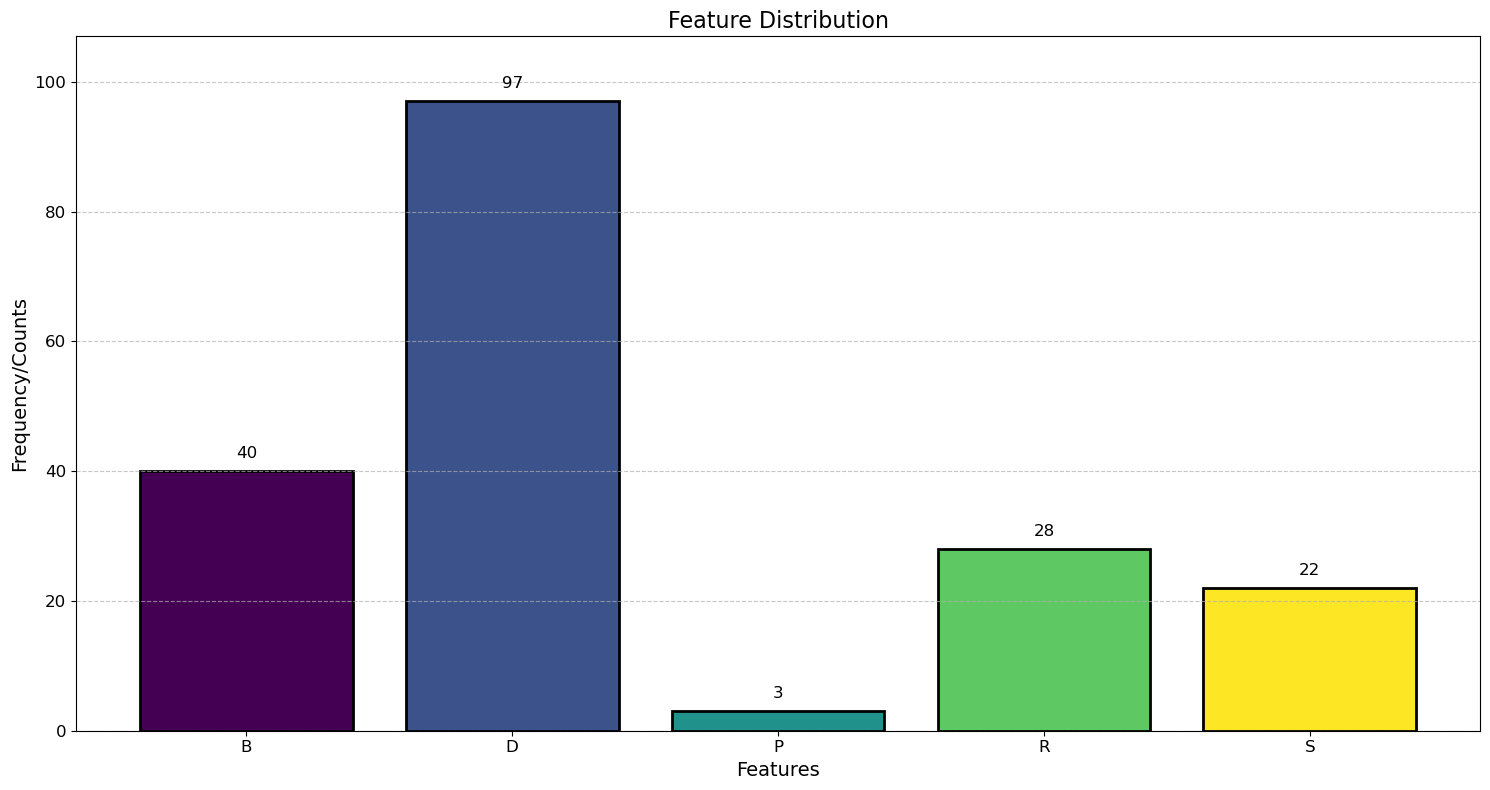

In [17]:
# From above output we plot a graph
categories = ['B', 'D', 'P', 'R', 'S']
cat_count_values = [40, 97, 3, 28, 22]
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(categories)))
plt.figure(figsize=(15, 8)) 
plt.bar(categories, cat_count_values, color=colors, edgecolor='black', linewidth=2)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Frequency/Counts', fontsize=14)
plt.title('Feature Distribution', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(cat_count_values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(cat_count_values) + 10)
plt.tight_layout()
plt.show()

In [ ]:
print(final_data.shape)
np.mean(final_data['target'])

In [19]:
#Printing all the grouping values for the different varibales 
final_data.describe().T

,count,mean,min,25%,50%,75%,max,std
target,1106499.0,0.248801,0.0,0.0,0.0,0.0,1.0,0.432318
S_2,1106499,2017-09-20 21:03:51.080190464,2017-03-01 00:00:00,2017-06-15 00:00:00,2017-09-23 00:00:00,2017-12-29 00:00:00,2018-03-31 00:00:00,NaN
P_2,1097256.0,0.657228,-0.458955,0.480795,0.695218,0.865683,1.01,0.244604
D_39,1106499.0,0.153173,0.0,0.004515,0.009034,0.236498,5.362196,0.271232
B_1,1106499.0,0.1239,-7.588799,0.008838,0.031085,0.125031,1.324059,0.212316
...,...,...,...,...,...,...,...,...
D_141,1086191.0,0.165198,0.0,0.003027,0.006056,0.009085,1.234725,0.348727
D_142,189846.0,0.387222,-0.014228,0.194956,0.375033,0.557059,1.752719,0.23677
D_143,1086191.0,0.179648,0.0,0.003025,0.006057,0.009086,1.01,0.37968
D_144,1098310.0,0.052692,0.0,0.00275,0.005509,0.008265,1.343331,0.182732


In [20]:
final_data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106499 entries, 0 to 1106498
Columns: 191 entries, customer_ID to D_145
dtypes: datetime64[ns](1), float64(185), int64(2), object(3)
memory usage: 1.6+ GB


In [24]:
# Printing all the Unique data types
set(final_data.dtypes)

{dtype('int64'), dtype('float64'), dtype('<M8[ns]'), dtype('O')}

In [21]:
# datatypes
df_dtypes = final_data.dtypes.reset_index()
df_dtypes

,index,0
0,customer_ID,object
1,target,int64
2,S_2,datetime64[ns]
3,P_2,float64
4,D_39,float64
...,...,...
186,D_141,float64
187,D_142,float64
188,D_143,float64
189,D_144,float64


## One hot encoding

In [22]:
#Identifying data that has data types as OBJECTS
final_data.dtypes[final_data.dtypes == "object"]

customer_ID    object
D_63           object
D_64           object
dtype: object

In [23]:
#Identifying duplicates for customer ID
final_data['customer_ID'][final_data['customer_ID'].duplicated()]

1          e8fb62c8f4ca64247de8c54c2e9649cfd9fc952979675e...
2          e8fb62c8f4ca64247de8c54c2e9649cfd9fc952979675e...
3          e8fb62c8f4ca64247de8c54c2e9649cfd9fc952979675e...
4          e8fb62c8f4ca64247de8c54c2e9649cfd9fc952979675e...
5          e8fb62c8f4ca64247de8c54c2e9649cfd9fc952979675e...
                                 ...                        
1106494    443c39eb5a5b9dda086f28a8644305d96b767d5b3185f4...
1106495    443c39eb5a5b9dda086f28a8644305d96b767d5b3185f4...
1106496    443c39eb5a5b9dda086f28a8644305d96b767d5b3185f4...
1106497    443c39eb5a5b9dda086f28a8644305d96b767d5b3185f4...
1106498    443c39eb5a5b9dda086f28a8644305d96b767d5b3185f4...
Name: customer_ID, Length: 1014716, dtype: object

In [24]:
#Converting categorical columns to objects 
object_list = ["D_63", "D_64"]

categorical_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

object_list = sorted(list(set(object_list + categorical_columns)))
print(object_list)

['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']


In [25]:
#Coverting the result column to a list 
final_data.select_dtypes(include=['uint8']).columns.tolist()

[]

In [26]:
#FInding the variables that are objects 
for i in object_list:
    final_data  = pd.get_dummies(final_data, columns=[i], prefix=[i])

final_data.dtypes[final_data.dtypes == "object"]  
# customer_ID and S_2 should not be one-hot encoded

customer_ID    object
dtype: object

In [27]:
#Extracting varibales that have datatype uint8
len(final_data.select_dtypes(include=['uint8']).columns.tolist())

0

In [28]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106499 entries, 0 to 1106498
Columns: 225 entries, customer_ID to D_68_6.0
dtypes: bool(45), datetime64[ns](1), float64(176), int64(2), object(1)
memory usage: 1.5+ GB


# 5. Feature Selection

In [29]:
# Adding mean, min, max, std and sum values as a new col
b_filtered_columns = [col for col in final_data.columns 
                        if col.startswith("B") and col not in categorical_columns]
d_filtered_columns = [col for col in final_data.columns 
                        if col.startswith("D") and col not in categorical_columns]
p_filtered_columns = [col for col in final_data.columns 
                        if col.startswith("P") and col not in categorical_columns]
s_filtered_columns = [col for col in final_data.columns 
                        if col.startswith("S") and col not in categorical_columns and col != 'S_2']
r_filtered_columns = [col for col in final_data.columns 
                        if col.startswith("R") and col not in categorical_columns]

final_data['B_avg'] = final_data[b_filtered_columns].mean(axis=1)
final_data['D_avg'] = final_data[d_filtered_columns].mean(axis=1)
final_data['P_avg'] = final_data[p_filtered_columns].mean(axis=1)
final_data['S_avg'] = final_data[s_filtered_columns].mean(axis=1)
final_data['R_avg'] = final_data[r_filtered_columns].mean(axis=1)

# ----

final_data['B_min'] = final_data[b_filtered_columns].min(axis=1)
final_data['D_min'] = final_data[d_filtered_columns].min(axis=1)
final_data['P_min'] = final_data[p_filtered_columns].min(axis=1)
final_data['S_min'] = final_data[s_filtered_columns].min(axis=1)
final_data['R_min'] = final_data[r_filtered_columns].min(axis=1)

# ----

final_data['B_max'] = final_data[b_filtered_columns].max(axis=1)
final_data['D_max'] = final_data[d_filtered_columns].max(axis=1)
final_data['P_max'] = final_data[p_filtered_columns].max(axis=1)
final_data['S_max'] = final_data[s_filtered_columns].max(axis=1)
final_data['R_max'] = final_data[r_filtered_columns].max(axis=1)

# ----

final_data['B_std'] = final_data[b_filtered_columns].std(axis=1)
final_data['D_std'] = final_data[d_filtered_columns].std(axis=1)
final_data['P_std'] = final_data[p_filtered_columns].std(axis=1)
final_data['S_std'] = final_data[s_filtered_columns].std(axis=1)
final_data['R_std'] = final_data[r_filtered_columns].std(axis=1)

# ----

final_data['B_sum'] = final_data[b_filtered_columns].sum(axis=1)
final_data['D_sum'] = final_data[d_filtered_columns].sum(axis=1)
final_data['P_sum'] = final_data[p_filtered_columns].sum(axis=1)
final_data['S_sum'] = final_data[s_filtered_columns].sum(axis=1)
final_data['R_sum'] = final_data[r_filtered_columns].sum(axis=1)

In [30]:
#Giving datatype error
final_data.drop(columns=['B_avg', 'B_sum'], inplace=True)

In [31]:
len([i for i in final_data.columns if i.startswith("R")])
final_data.describe()

,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,R_min,P_max,S_max,R_max,P_std,S_std,R_std,P_sum,S_sum,R_sum
count,1.106499e+06,1106499,1.097256e+06,1.106499e+06,1.106499e+06,1.106116e+06,1.106499e+06,903595.000000,1.106116e+06,1.106116e+06,...,1.106499e+06,1.106499e+06,1.106499e+06,1.106499e+06,1.098468e+06,1.106499e+06,1.106499e+06,1.106499e+06,1.106499e+06,1.106499e+06
mean,2.488009e-01,2017-09-20 21:03:51.080190464,6.572282e-01,1.531728e-01,1.238998e-01,6.229559e-01,7.892763e-02,0.226005,6.016393e-02,1.316577e-01,...,-7.848501e-05,7.785749e-01,1.088948e+00,1.301634e+00,3.784387e-01,3.633562e-01,3.321494e-01,1.364282e+00,5.339642e+00,2.925020e+00
min,0.000000e+00,2017-03-01 00:00:00,-4.589548e-01,3.267188e-08,-7.588799e+00,3.419474e-07,1.917514e-08,-0.428302,3.440668e-09,1.042180e-07,...,-9.158834e-02,2.944163e-06,3.614962e-01,7.743156e-03,1.005142e-06,1.064263e-01,2.391202e-03,-1.443172e+00,-3.058528e+02,3.652132e-02
25%,0.000000e+00,2017-06-15 00:00:00,4.807947e-01,4.515396e-03,8.837754e-03,1.065209e-01,2.895573e-03,0.127428,2.872752e-03,5.236625e-03,...,1.185687e-04,6.596457e-01,9.741907e-01,1.004936e+00,3.190805e-01,3.277694e-01,2.711559e-01,1.158034e+00,3.941826e+00,2.124528e+00
50%,0.000000e+00,2017-09-23 00:00:00,6.952180e-01,9.033834e-03,3.108470e-02,8.143927e-01,5.782024e-03,0.164083,5.749634e-03,9.773376e-03,...,2.916335e-04,8.152638e-01,9.791680e-01,1.007180e+00,3.940094e-01,3.400939e-01,2.718873e-01,1.405507e+00,5.365444e+00,2.154185e+00
75%,0.000000e+00,2017-12-29 00:00:00,8.656834e-01,2.364982e-01,1.250314e-01,1.002422e+00,8.660994e-03,0.258359,8.616713e-03,1.535936e-01,...,5.822235e-04,9.408446e-01,1.005299e+00,1.008858e+00,4.539100e-01,3.644837e-01,2.742483e-01,1.578699e+00,6.264612e+00,2.439114e+00
max,1.000000e+00,2018-03-31 00:00:00,1.010000e+00,5.362196e+00,1.324059e+00,1.010000e+00,2.759651e+00,3.582628,8.988807e+00,1.517175e+00,...,5.507067e-03,2.428051e+00,5.571651e+02,1.039222e+03,1.215924e+00,1.332535e+02,2.036549e+02,3.794868e+00,4.744648e+02,1.061291e+03
std,4.323184e-01,NaN,2.446035e-01,2.712324e-01,2.123159e-01,4.009931e-01,2.268974e-01,0.193418,2.036898e-01,2.339810e-01,...,5.497220e-03,1.921715e-01,1.232481e+00,6.250069e+00,1.006387e-01,3.435880e-01,1.218198e+00,4.052873e-01,2.444842e+00,7.180389e+00


## Train-Test-Split

In [32]:
# We also remove features that are related to these plans, 
# as we do not consider those observations for modeling.
final_data.drop(["customer_ID", "S_2"], axis = 1, inplace = True)

In [33]:
print(final_data.columns)

Index(['target', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3',
       'D_42',
       ...
       'R_max', 'B_std', 'D_std', 'P_std', 'S_std', 'R_std', 'D_sum', 'P_sum',
       'S_sum', 'R_sum'],
      dtype='object', length=246)


In [34]:
#Preparing the data for test and train
X_train, X_test, y_train, y_test = train_test_split(final_data[[i for i in final_data.columns if i not in ['target']]], final_data['target'], test_size=0.3, random_state=42)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [35]:
#Printing the dimensions
print("Training sample shape; ", X_train.shape)
print("Training target shape; ", y_train.shape)
print("Testing sample 1 shape; ", X_test1.shape)
print("Testing target 1 shape; ", y_test1.shape)
print("Testing sample 1 shape; ", X_test2.shape)
print("Testing target 1 shape; ", y_test2.shape)

Training sample shape;  (774549, 245)
Training target shape;  (774549,)
Testing sample 1 shape;  (165975, 245)
Testing target 1 shape;  (165975,)
Testing sample 1 shape;  (165975, 245)
Testing target 1 shape;  (165975,)


In [36]:
# Eliminating the features based on corr and Feature Importance
final_data.corr()

,target,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,R_max,B_std,D_std,P_std,S_std,R_std,D_sum,P_sum,S_sum,R_sum
target,1.000000,-0.612400,0.180906,0.390249,-0.482845,0.364458,0.323760,0.248990,0.430995,0.339978,...,0.057165,0.019100,0.024576,-0.362740,0.045673,0.062827,0.151039,-0.306283,0.110948,0.124652
P_2,-0.612400,1.000000,-0.192001,-0.367862,0.543419,-0.464193,-0.335988,-0.317520,-0.454098,-0.467743,...,-0.094439,-0.015359,-0.036872,0.612390,-0.038836,-0.102084,-0.179726,0.585101,-0.104455,-0.187149
D_39,0.180906,-0.192001,1.000000,0.183191,-0.197361,0.197661,0.055061,0.445160,0.173587,0.070391,...,0.035725,0.030039,0.036696,-0.113644,0.038080,0.040353,0.184453,-0.164798,0.173983,0.077792
B_1,0.390249,-0.367862,0.183191,1.000000,-0.631481,0.227315,0.154672,0.184435,0.729145,-0.055905,...,0.028305,0.013636,0.011385,-0.295179,0.042661,0.032975,0.151091,-0.252379,0.124014,0.065015
B_2,-0.482845,0.543419,-0.197361,-0.631481,1.000000,-0.302175,-0.235091,-0.259000,-0.713585,-0.085418,...,-0.038498,-0.008918,-0.020686,0.363783,-0.029206,-0.043957,-0.195391,0.303741,-0.059648,-0.090728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_std,0.062827,-0.102084,0.040353,0.032975,-0.043957,0.184453,0.022733,0.071163,0.046895,0.032626,...,0.999180,0.003555,0.027357,-0.060543,0.003954,1.000000,0.072572,-0.092913,0.009193,0.975651
D_sum,0.151039,-0.179726,0.184453,0.151091,-0.195391,0.205500,0.001345,0.160720,0.222413,0.080553,...,0.067506,0.017378,0.716232,-0.075315,0.017533,0.072572,1.000000,-0.160746,0.092854,0.116623
P_sum,-0.306283,0.585101,-0.164798,-0.252379,0.303741,-0.352803,-0.098239,-0.277721,-0.361079,-0.322181,...,-0.085926,-0.012786,-0.032293,0.317696,-0.019621,-0.092913,-0.160746,1.000000,-0.026426,-0.157893
S_sum,0.110948,-0.104455,0.173983,0.124014,-0.059648,0.132588,0.210030,0.067387,0.045873,0.018522,...,0.007723,0.071808,0.025326,-0.087024,0.134284,0.009193,0.092854,-0.026426,1.000000,0.019989


In [37]:
correlation_matrix = final_data.corr()
mask = (correlation_matrix > 0.7) | (correlation_matrix < -0.7)  # mask for values > 0.7 or < -0.7
high_correlation_features = correlation_matrix[mask].stack().reset_index()
high_correlation_features.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_correlation_features = high_correlation_features[high_correlation_features['Feature 1'] != high_correlation_features['Feature 2']]
high_correlation_features.sort_values(['Correlation'], ascending=False)

,Feature 1,Feature 2,Correlation
122,D_62,D_77,0.999768
189,D_77,D_62,0.999768
274,D_104,D_103,0.999751
271,D_103,D_104,0.999751
439,R_avg,R_sum,0.999667
...,...,...,...
380,D_114_0.0,D_114_1.0,-0.935066
368,B_30_1.0,B_30_0.0,-0.958784
364,B_30_0.0,B_30_1.0,-0.958784
173,D_73,D_134,-0.997886


## Feature importance using XGB Classifier (feature importance)

In [38]:
print(final_data.dtypes)

target      int64
P_2       float64
D_39      float64
B_1       float64
B_2       float64
           ...   
R_std     float64
D_sum      object
P_sum     float64
S_sum     float64
R_sum     float64
Length: 246, dtype: object


In [39]:
# List of columns to convert
cols_to_convert = ['D_avg', 'B_min', 'D_min', 'B_max', 'D_max', 'B_std', 'D_std', 'D_sum']

# Convert columns to numeric
for col in cols_to_convert:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')

# Now you can fit the model
xgb_instance = xgb.XGBClassifier()
model_for_feature_selection = xgb_instance.fit(X_train, y_train)

In [40]:
model_for_feature_selection

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

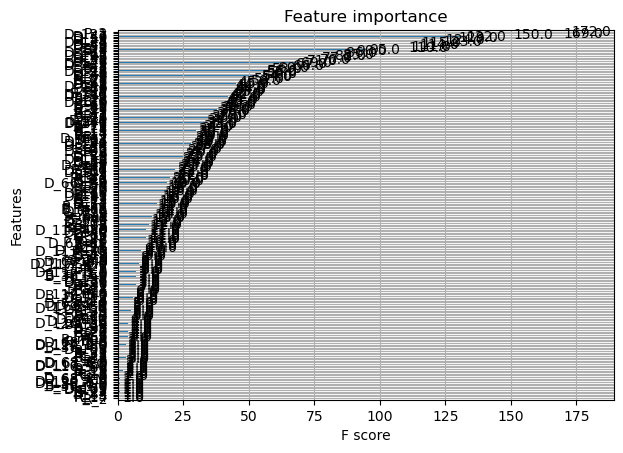

In [41]:
#Plotting a graph
xgb.plot_importance(model_for_feature_selection, importance_type='weight')

In [42]:
#Sorting the dataframe
feature_importance = {'Feature':X_train.columns, 'Importance':model_for_feature_selection.feature_importances_}
feature_importance = pd.DataFrame(feature_importance)
feature_importance.sort_values("Importance", inplace=True, ascending=False)
feature_importance

,Feature,Importance
0,P_2,0.210423
2,B_1,0.057950
21,B_8,0.039724
24,B_9,0.031262
3,B_2,0.025231
...,...,...
213,D_66_0.0,0.000000
105,B_31,0.000000
101,D_87,0.000000
104,D_88,0.000000


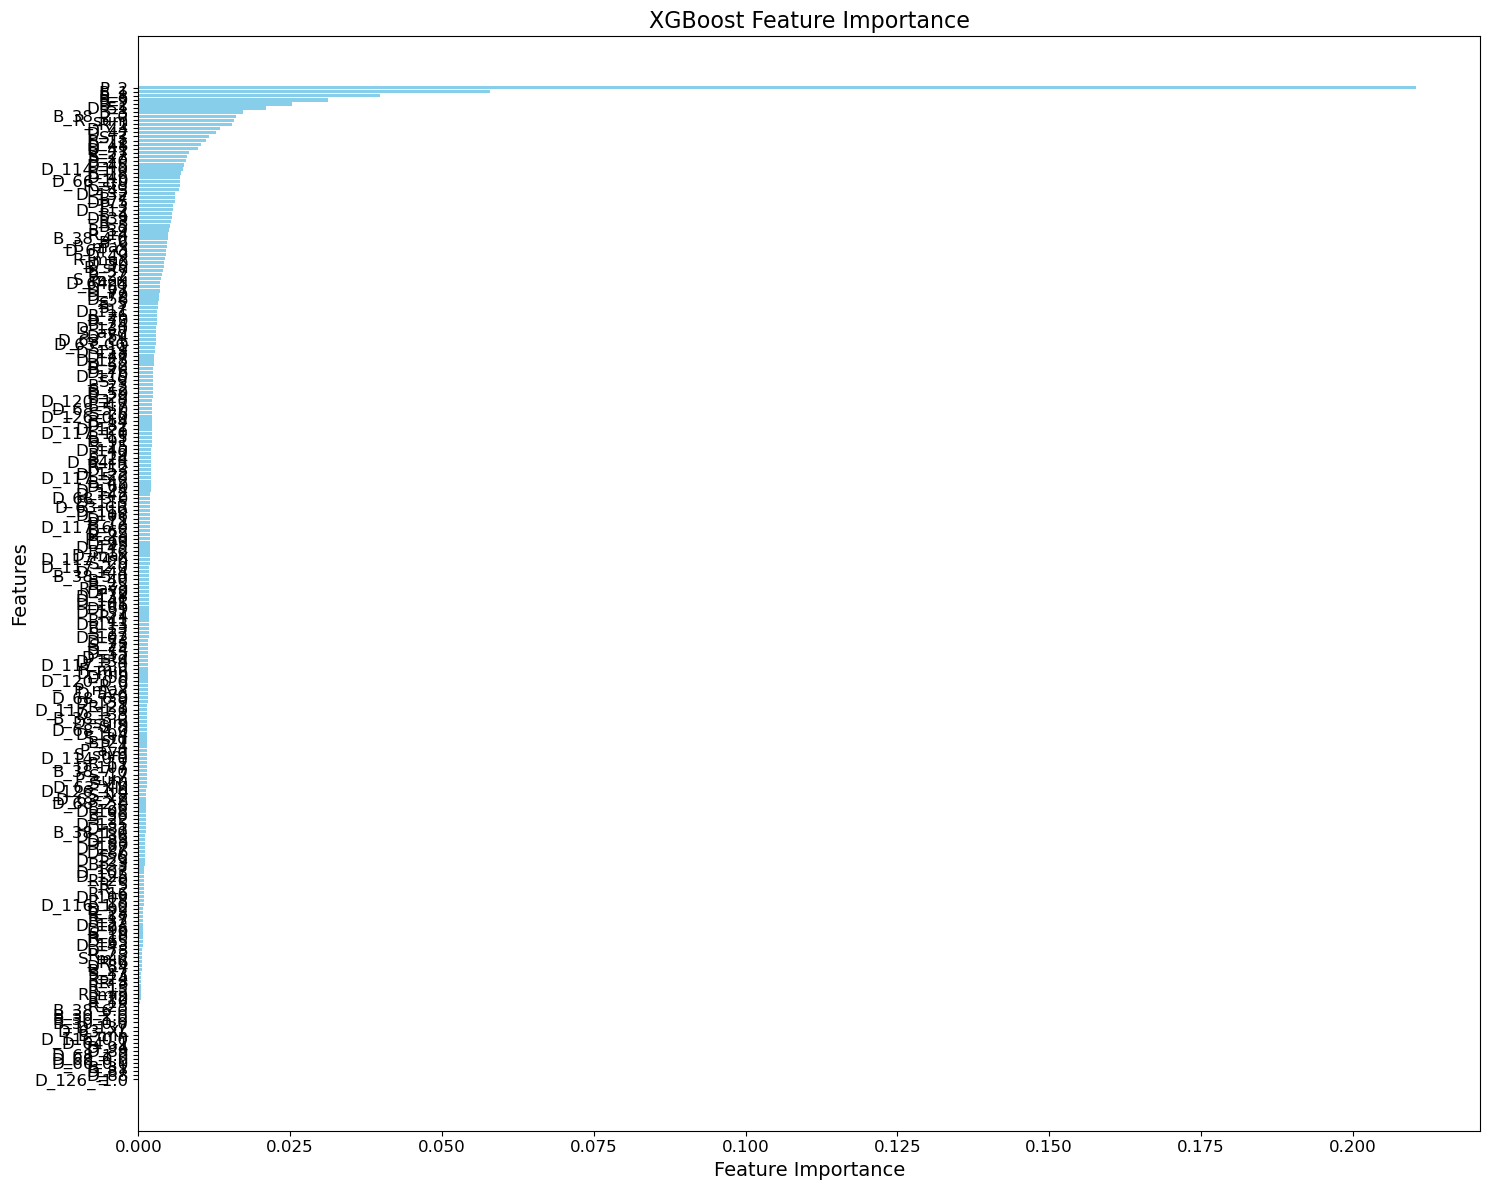

In [43]:
#Plotting the graph (XGBoost Feature Importance)
plt.figure(figsize=(15, 12))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('XGBoost Feature Importance', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

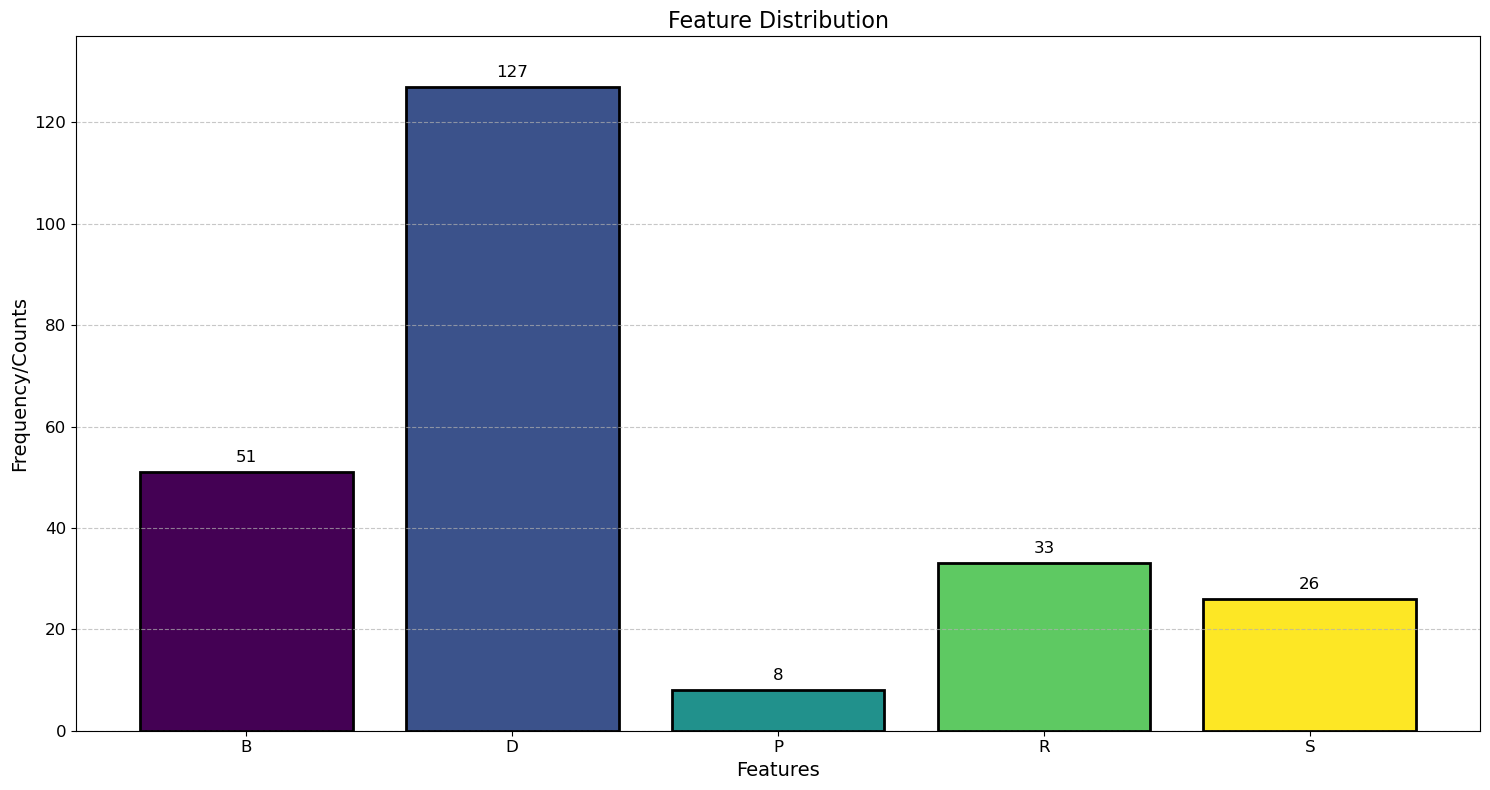

In [44]:
#Plotting the graph (FEATURE DISTRIBUTION)
categories = ['B', 'D', 'P', 'R', 'S']
cat_count_values = [len([i for i in X_train.columns if i.startswith("B")]), 
                    len([i for i in X_train.columns if i.startswith("D")]), 
                    len([i for i in X_train.columns if i.startswith("P")]), 
                    len([i for i in X_train.columns if i.startswith("R")]), 
                    len([i for i in X_train.columns if i.startswith("S")])]
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(categories)))
plt.figure(figsize=(15, 8)) 
plt.bar(categories, cat_count_values, color=colors, edgecolor='black', linewidth=2)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Frequency/Counts', fontsize=14)
plt.title('Feature Distribution', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(cat_count_values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(cat_count_values) + 10)
plt.tight_layout()
plt.show()

In [45]:
#getting the final features
final_features = feature_importance["Feature"][feature_importance.Importance > 0.005]
X_train = X_train[final_features]
X_test1 = X_test1[final_features]
X_test2 = X_test2[final_features]

In [46]:
#Printing the dimensions  
print(X_train.shape)
print(X_test1.shape)
print(X_test2.shape)

(774549, 35)
(165975, 35)
(165975, 35)


In [47]:
#Checking if its nulll data 
X_train.isnull().sum()[final_data.isnull().sum()>0].index
X_train.fillna(np.NaN, inplace=True)

#### Code for the XGBoost model on the train sample with default parameters

In [48]:
#training the XGBoost classifier on training data.
counter = 0
xgb_instance = xgb.XGBClassifier()

#Extracting the feature importance values
updated_model_for_feature_selection = xgb_instance.fit(X_train, y_train)
feature_importance1 = {'Feature':X_train.columns, 'Importance':updated_model_for_feature_selection.feature_importances_}

#Sorting them into dataframe
feature_importance1 = pd.DataFrame(feature_importance1)

#Sorting them
feature_importance1.sort_values("Importance", inplace=True, ascending=False)
counter = counter + 1

#Saving them into CSV
feature_importance1.to_csv(dir_path + os.sep + "{}_feature_importance.csv".format(counter), index=False)
feature_importance1

,Feature,Importance
0,P_2,0.403499
1,B_1,0.064827
7,B_38_2.0,0.039807
6,B_3,0.035152
3,B_9,0.035081
11,D_42,0.028547
4,B_2,0.025207
2,B_8,0.023050
9,R_1,0.020405
10,D_44,0.019778


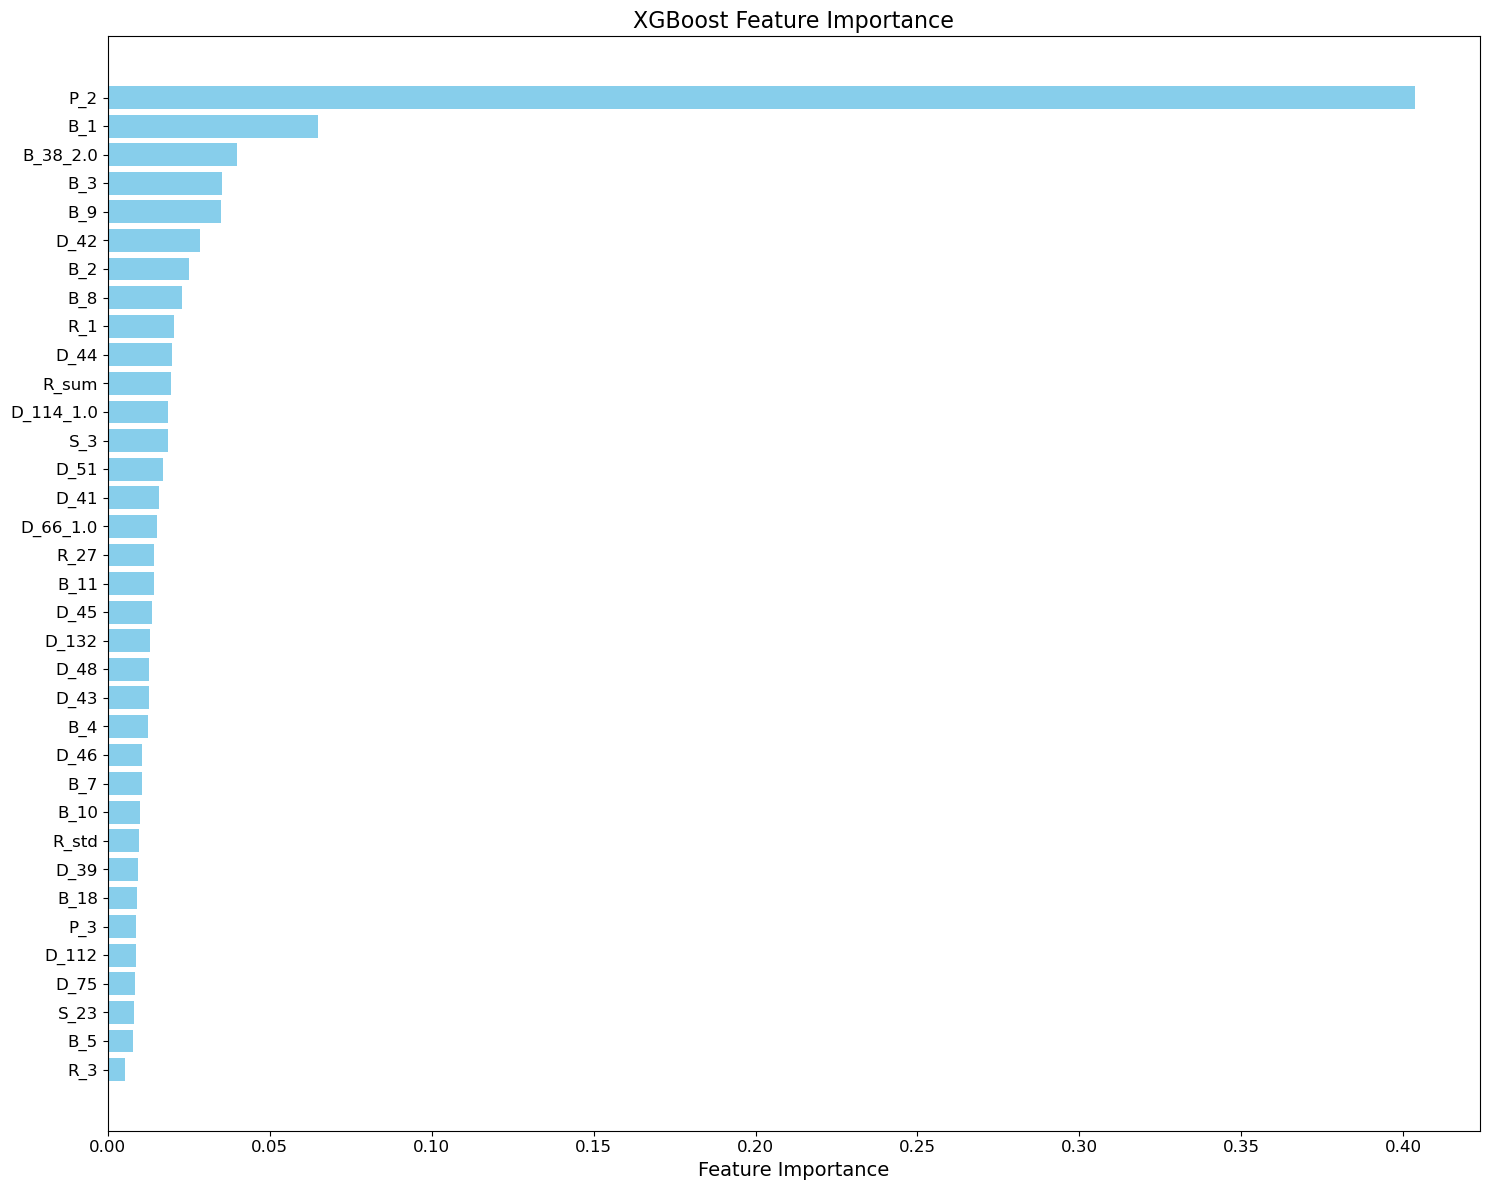

In [49]:
#Plotting graph
xgb_instance = xgb.XGBClassifier()
model_for_feature_selection = xgb_instance.fit(X_train, y_train)

feature_importance = {'Feature': X_train.columns, 'Importance': model_for_feature_selection.feature_importances_}
feature_importance = pd.DataFrame(feature_importance1)
feature_importance.sort_values("Importance", inplace=True, ascending=False)

plt.figure(figsize=(15, 12))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Feature Importance', fontsize=14)
plt.title('XGBoost Feature Importance', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### XGBoost model with specific parameters

In [50]:
#Parameters used to fine tune the behavior of the XGBoost classifier
params = {
    'n_estimators': 300,  # no. of trees
    'learning_rate': 0.5,  # learning-rate
    'max_depth': 4,  # max depth
    'subsample': 0.5,  # fraction of observations to build each tree
    'colsample_bytree': 0.5,  # fraction of features to build each tree
    'scale_pos_weight': 5,  # weight of default observations
    'random_state': 42  # random seed
}

In [51]:
#Segments trains an XGBoost classifier
xgb_instance = xgb.XGBClassifier(**params)

#Feature Extraction 
model_for_feature_selection = xgb_instance.fit(X_train, y_train)
feature_importance2 = {'Feature':X_train.columns,'Importance':model_for_feature_selection.feature_importances_}
feature_importance2 = pd.DataFrame(feature_importance2)
feature_importance2.sort_values("Importance", inplace=True, ascending=False)
counter = counter + 1

#Further saves them into CSV
feature_importance2.to_csv(dir_path + os.sep + "{}_feature_importance.csv".format(counter), index=False)
feature_importance2

,Feature,Importance
10,D_44,0.248497
3,B_9,0.111229
14,D_48,0.072188
20,D_114_1.0,0.061282
6,B_3,0.044275
11,D_42,0.038921
12,S_3,0.034873
13,B_11,0.029872
19,D_45,0.026371
0,P_2,0.025487


#### Keep features that have feature importance of higher 0.5% in any of the two models. 

In [56]:
# [i for i in feature_importance1['Feature'] if i not in feature_importance2['Feature']]

In [52]:
#Extracting the final futures
final_features = feature_importance2["Feature"][feature_importance2.Importance > 0.005]
X_train = X_train[final_features]
X_test1 = X_test1[final_features]
X_test2 = X_test2[final_features]

# XGBoost Gridsearch

In [53]:
# Check for any remaining non-numeric values in the DataFrame
non_numeric_values = final_data[~final_data.applymap(np.isreal).all(1)]
print("Non-numeric values in the DataFrame:")
print(non_numeric_values)


C:\Users\anxiousviking\AppData\Local\Temp\ipykernel_67340\2883217863.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_values = final_data[~final_data.applymap(np.isreal).all(1)]


Non-numeric values in the DataFrame:
Empty DataFrame
Columns: [target, P_2, D_39, B_1, B_2, R_1, S_3, D_41, B_3, D_42, D_43, D_44, B_4, D_45, B_5, R_2, D_46, D_47, D_48, D_49, B_6, B_7, B_8, D_50, D_51, B_9, R_3, D_52, P_3, B_10, D_53, S_5, B_11, S_6, D_54, R_4, S_7, B_12, S_8, D_55, D_56, B_13, R_5, D_58, S_9, B_14, D_59, D_60, D_61, B_15, S_11, D_62, D_65, B_16, B_17, B_18, B_19, B_20, S_12, R_6, S_13, B_21, D_69, B_22, D_70, D_71, D_72, S_15, B_23, D_73, P_4, D_74, D_75, D_76, B_24, R_7, D_77, B_25, B_26, D_78, D_79, R_8, R_9, S_16, D_80, R_10, R_11, B_27, D_81, D_82, S_17, R_12, B_28, R_13, D_83, R_14, R_15, D_84, R_16, B_29, ...]
Index: []

[0 rows x 246 columns]


In [68]:
# grid search
table = pd.DataFrame(columns=["Num Trees", "Learning Rate",
                              "Percent of obs used in tree",
                              "Percent of features used in tree",
                              "Weight of def obs", "AUC Train",
                              "AUC Test1", "AUC Test2"])

row = 0

for trees in [50, 100, 300]:
    for lr in [0.01, 0.1]:
        for per_observations in [0.5, 0.8]:
            for feat_tree in [0.5, 1]:
                for weight in [1, 5, 10]:
                    xgb_instance = xgb.XGBClassifier(n_estimators=trees,
                                                      learning_rate=lr,
                                                      subsample=per_observations,
                                                      colsample_bytree=feat_tree,
                                                      scale_pos_weight=weight,
                                                      random_state=42)
                    xg_iter_model = xgb_instance.fit(X_train, y_train)

                    table.loc[row, "Num Trees"] = trees
                    table.loc[row, "Learning Rate"] = lr
                    table.loc[row, "Percent of obs used in tree"] = per_observations
                    table.loc[row, "Percent of features used in tree"] = feat_tree
                    table.loc[row, "Weight of def obs"] = weight

                    table.loc[row, "AUC Train"] = roc_auc_score(y_train, xg_iter_model.predict_proba(X_train)[:, 1])
                    table.loc[row, "AUC Test1"] = roc_auc_score(y_test1, xg_iter_model.predict_proba(X_test1)[:, 1])
                    table.loc[row, "AUC Test2"] = roc_auc_score(y_test2, xg_iter_model.predict_proba(X_test2)[:, 1])

                    row = row + 1

table


,Num Trees,Learning Rate,Percent of obs used in tree,Percent of features used in tree,Weight of def obs,AUC Train,AUC Test1,AUC Test2
0,50,0.01,0.5,0.5,1,0.929153,0.927965,0.928697
1,50,0.01,0.5,0.5,5,0.927542,0.926393,0.927237
2,50,0.01,0.5,0.5,10,0.926809,0.925605,0.926584
3,50,0.01,0.5,1,1,0.926178,0.924901,0.925352
4,50,0.01,0.5,1,5,0.924525,0.923375,0.92409
...,...,...,...,...,...,...,...,...
67,300,0.1,0.8,0.5,5,0.948602,0.941756,0.941987
68,300,0.1,0.8,0.5,10,0.948189,0.941229,0.941772
69,300,0.1,0.8,1,1,0.950662,0.943087,0.943349
70,300,0.1,0.8,1,5,0.949963,0.942459,0.942785


In [69]:
# Fit the model
xg_iter_model = xgb_instance.fit(X_train, y_train)

# Now you can predict probabilities on the training data
x = [i for i in xg_iter_model.predict_proba(X_train)[:,1]]


In [75]:
table.to_csv(dir_path+os.sep+"model.csv")

In [76]:
X_train.dtypes[X_train.dtypes=="object"]

Series([], dtype: object)

In [77]:
X_train.columns

Index(['D_44', 'B_9', 'D_48', 'D_114_1.0', 'B_3', 'D_42', 'S_3', 'B_11',
       'D_45', 'P_2', 'B_18', 'R_3', 'R_sum', 'D_66_1.0', 'B_8', 'D_51',
       'D_41', 'D_75', 'B_2', 'D_132', 'D_43', 'B_10', 'D_112', 'R_27', 'B_5',
       'P_3', 'R_std', 'B_4', 'B_38_2.0', 'B_1', 'D_46', 'D_39', 'S_23',
       'B_7'],
      dtype='object')

# Best Model of XGBoost

In [78]:
# From the table we can decide on a best model as shown below;

train_threshold, difference_threshold = 0.85, 0.05
best_auc = 0  # Initialize the best_auc as 0
best_model = None  # Initialize the best model as None

for index, row in table.iterrows():
    # Calculate the maximum difference between train AUC and test AUCs
    max_difference = max(abs(row['AUC Train'] - row['AUC Test1']), abs(row['AUC Train'] - row['AUC Test2']))
    # Check if the model has low bias (AUC Train > train_threshold) and low variance (max_difference < difference_threshold)
    if row['AUC Train'] > train_threshold and max_difference < difference_threshold:
        # Check if this model has a higher average AUC score on the test sets than the current best model
        average_test_auc = (row['AUC Test1'] + row['AUC Test2']) / 2
        if average_test_auc > best_auc:
            best_auc = average_test_auc
            best_model = row

# Print the parameters of the best model
if best_model is not None:
    print("Best Model:")
    print(best_model)
else:
    print("No model found that satisfies the given conditions.")

Best Model:
Num Trees                                300
Learning Rate                            0.1
Percent of obs used in tree              0.8
Percent of features used in tree           1
Weight of def obs                          1
AUC Train                           0.950662
AUC Test1                           0.943087
AUC Test2                           0.943349
Name: 69, dtype: object


In [79]:
#Paraments used to fine tune the behavior of the XGBoost
params = {
    'n_estimators': 300,  # no. of trees
    'learning_rate': 0.1,  # learning-rate
    'max_depth': 4,  # max depth
    'subsample': 0.8,  # fraction of observations to build each tree
    'colsample_bytree': 1,  # fraction of features to build each tree
    'scale_pos_weight': 1,  # weight of default observations
    'random_state': 42  # random seed
}

In [80]:
#Parameters used to train data
xgb_instance = xgb.XGBClassifier(**params)
final_xgboost_model = xgb_instance.fit(X_train, y_train)
final_xgboost_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [82]:
#Calculating the feature impotance values 
feature_importance = {'Feature':X_train.columns, 'Importance':final_xgboost_model.feature_importances_}
feature_importance = pd.DataFrame(feature_importance)
feature_importance.sort_values("Importance", inplace=True, ascending=False)
counter = counter + 1
feature_importance.to_csv(dir_path + os.sep + "{}_feature_importancev.csv".format(counter), index=False)
feature_importance.head()

,Feature,Importance
9,P_2,0.371130
29,B_1,0.069881
18,B_2,0.049710
4,B_3,0.040441
1,B_9,0.034572


#### Prediction using XGBoost Model

In [83]:
# Now you can make predictions
predictions = final_xgboost_model.predict_proba(X_test1)[:, 1]

# Create DataFrame for predictions
y_pred_xgboost = pd.DataFrame({"Actual": y_train, "Prediction": final_xgboost_model.predict_proba(X_train)[:,1]})

# Define quantiles for binning
quantiles = list(set(y_pred_xgboost.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0, 0)
quantiles.insert(len(quantiles), 1)

# Bin predictions based on quantiles
y_pred_xgboost["Score Bins"] = pd.cut(y_pred_xgboost["Prediction"], quantiles)

# Calculate statistics based on bins
statistics = y_pred_xgboost.groupby("Score Bins")["Actual"].agg(["sum", "count"])
statistics["Bad Rate"] = statistics["sum"] / statistics["count"]
statistics.reset_index(inplace=True)


C:\Users\anxiousviking\AppData\Local\Temp\ipykernel_67340\4274945118.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  statistics = y_pred_xgboost.groupby("Score Bins")["Actual"].agg(["sum", "count"])


## Plots for XGBoost Model and SHAP Analysis

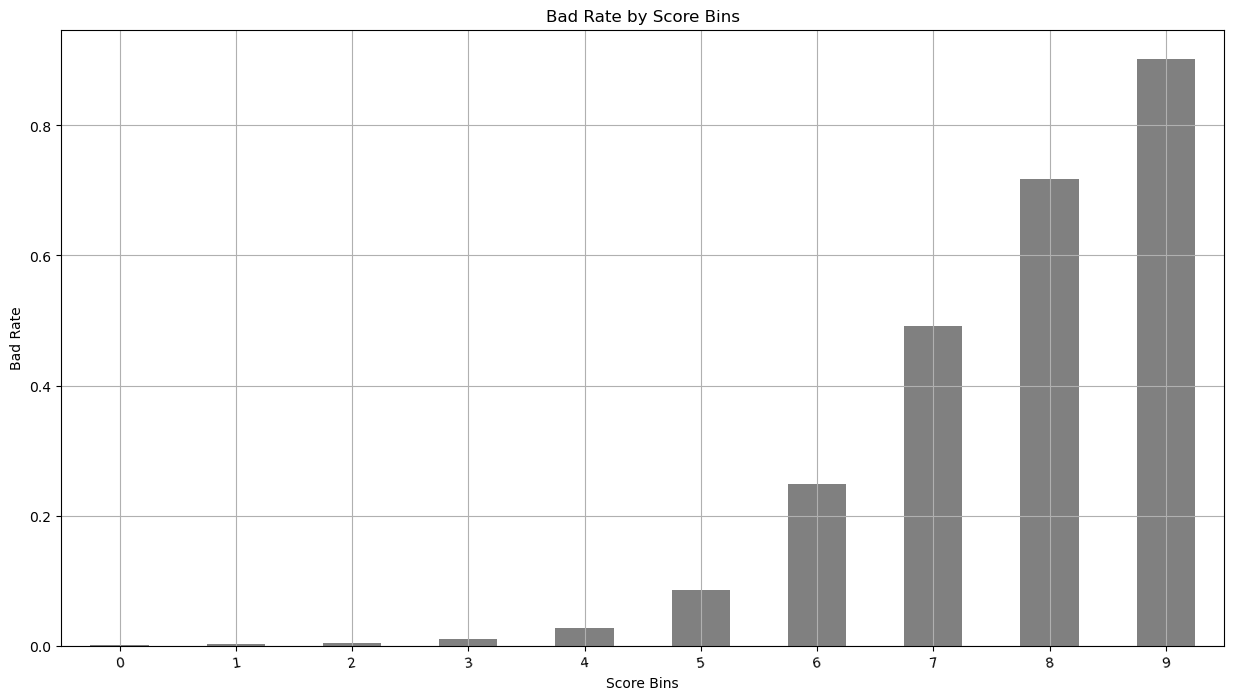

In [84]:
#Creating bar plot
plt.figure(figsize=(15, 8))
statistics['Bad Rate'].plot(kind='bar', color='grey')
plt.xlabel("Score Bins")
plt.xticks(rotation=8)
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()

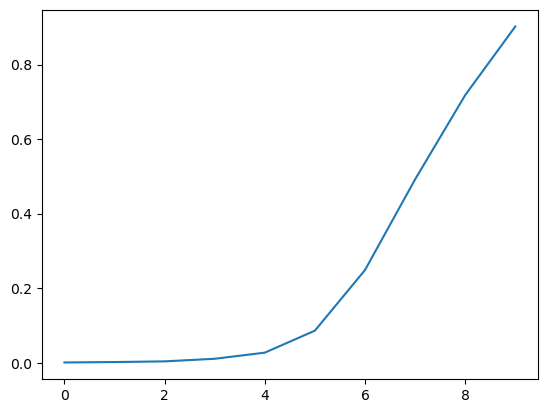

In [85]:
plt.plot(statistics["Bad Rate"])  # statistics["Bad Rate"].plot()

## Performance of XGB Model

In [89]:
#Calculating bad rate
performance1 = pd.DataFrame({"Actual": y_test1, "Prediction": final_xgboost_model.predict_proba(X_test1)[:,1]})
performance1["Score Bins"] = pd.cut(performance1["Prediction"], quantiles)
statistics1 = performance1.groupby("Score Bins")["Actual"].agg(["sum", "count"])
statistics1["Bad Rate"] = statistics1["sum"] / statistics1["count"]
statistics1.reset_index(inplace=True)
statistics1.head(1)

C:\Users\anxiousviking\AppData\Local\Temp\ipykernel_67340\2219715469.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  statistics1 = performance1.groupby("Score Bins")["Actual"].agg(["sum", "count"])


,Score Bins,sum,count,Bad Rate
0,"(0.0, 0.00184]",9,16761,0.000537


In [90]:
# Drop 'B_avg' and 'B_sum' columns from X_test2
X_test2_processed = X_test2

# Make predictions on the processed testing data
predictions = final_xgboost_model.predict_proba(X_test2_processed)[:, 1]

# Create DataFrame for predictions
performance2 = pd.DataFrame({"Actual": y_test2, "Prediction": predictions})

# Compute statistics
performance2["Score Bins"] = pd.cut(performance2["Prediction"], quantiles)
statistics2 = performance2.groupby("Score Bins")["Actual"].agg(["sum", "count"])
statistics2["Bad Rate"] = statistics2["sum"] / statistics2["count"]
statistics2.reset_index(inplace=True)
statistics2.head(1)


C:\Users\anxiousviking\AppData\Local\Temp\ipykernel_67340\2622827778.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  statistics2 = performance2.groupby("Score Bins")["Actual"].agg(["sum", "count"])


,Score Bins,sum,count,Bad Rate
0,"(0.0, 0.00184]",15,16398,0.000915


In [91]:
#Combines bad rate statistics from multiple DataFrames into a single DataFrame
dfs = [statistics, statistics1, statistics2]
bad_scores = [df["Bad Rate"] for df in dfs]
combined_df = pd.concat(bad_scores, axis=1)
combined_df.index = statistics['Score Bins']
combined_df

,Bad Rate,Bad Rate,Bad Rate
Score Bins,,,
"(0.0, 0.00184]",0.000788,0.000537,0.000915
"(0.00184, 0.00379]",0.001924,0.001273,0.001496
"(0.00379, 0.00788]",0.003783,0.003692,0.004297
"(0.00788, 0.0182]",0.010716,0.011553,0.011798
"(0.0182, 0.0482]",0.027138,0.028083,0.026949
"(0.0482, 0.152]",0.086180,0.090222,0.090037
"(0.152, 0.371]",0.248790,0.255447,0.253289
"(0.371, 0.61]",0.492041,0.489341,0.487128
"(0.61, 0.804]",0.718069,0.715225,0.718687


C:\Users\anxiousviking\AppData\Local\Temp\ipykernel_67340\2495444946.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(combined_df.index)


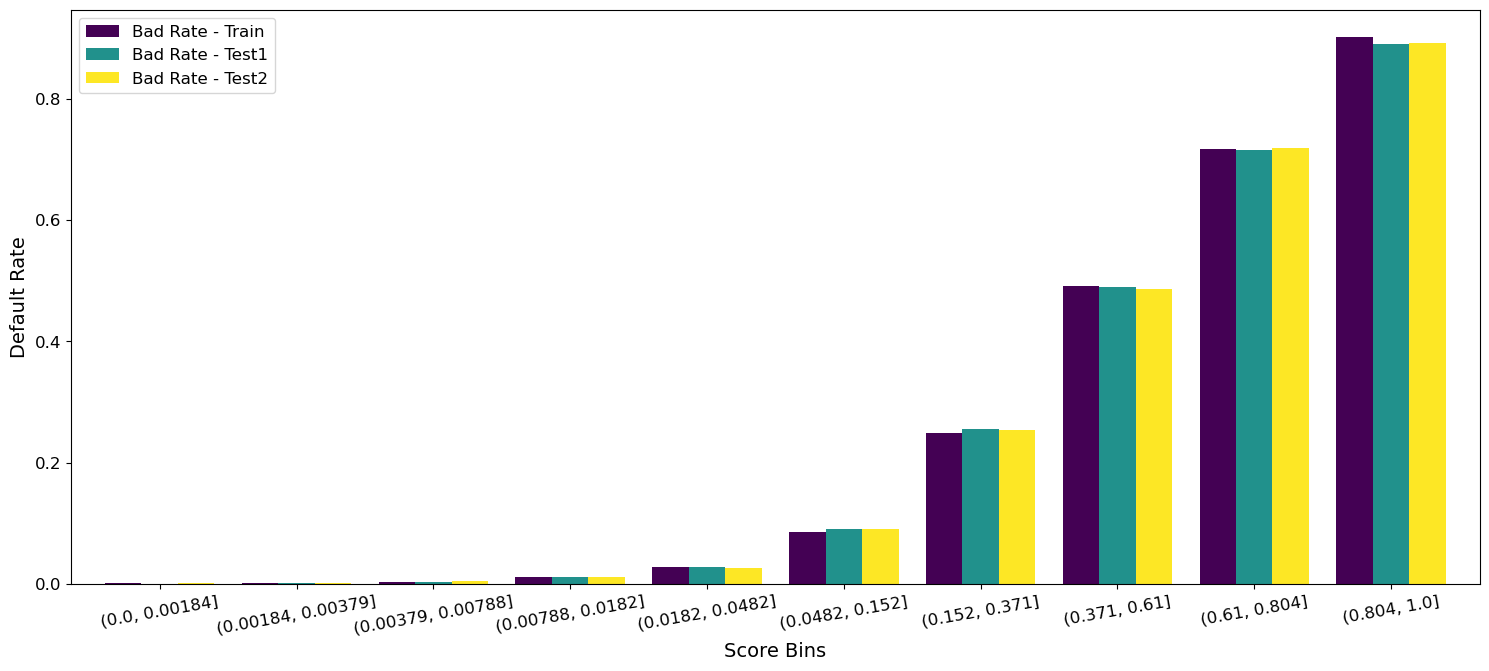

In [92]:
#Plotting graph
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xticklabels(combined_df.index)
combined_df.plot(kind='bar', ax=ax, colormap='viridis', width=0.8)
plt.xlabel('Score Bins', fontsize=14)
plt.ylabel('Default Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Bad Rate - Train', 'Bad Rate - Test1', 'Bad Rate - Test2'], fontsize=12)
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()

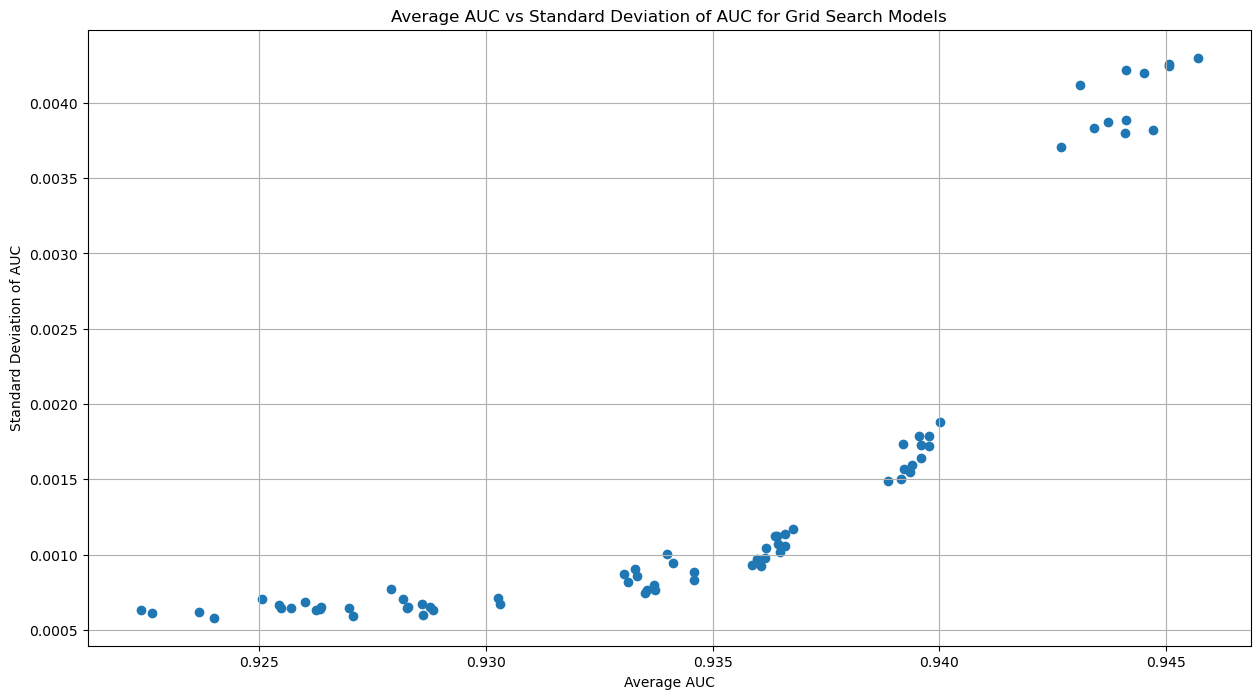

In [93]:
# Average and standard deviation of AUCs
table['Average AUC'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].mean(axis=1)
table['Standard Deviation AUC'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].std(axis=1)

# Plot(s)
# Create scatter plot (Average AUC vs Standard Deviation of AUC for Grid Search Models)
plt.figure(figsize=(15, 8))
plt.scatter(table['Average AUC'], table['Standard Deviation AUC'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs Standard Deviation of AUC for Grid Search Models')
plt.grid(True)
plt.show()

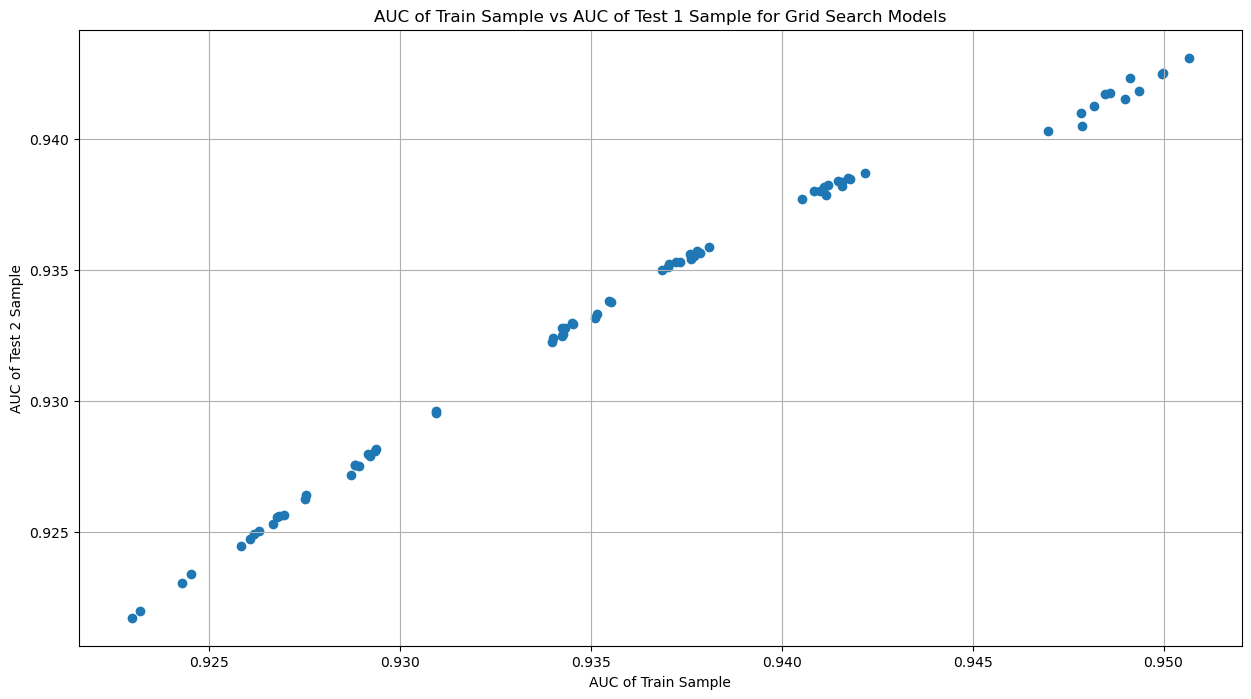

In [94]:
# Create scatter plot (AUC of train sample vs AUC of Test 1 sample)
plt.figure(figsize=(15, 8))
plt.scatter(table['AUC Train'], table['AUC Test1'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs AUC of Test 1 Sample for Grid Search Models')
plt.grid(True)
plt.show()

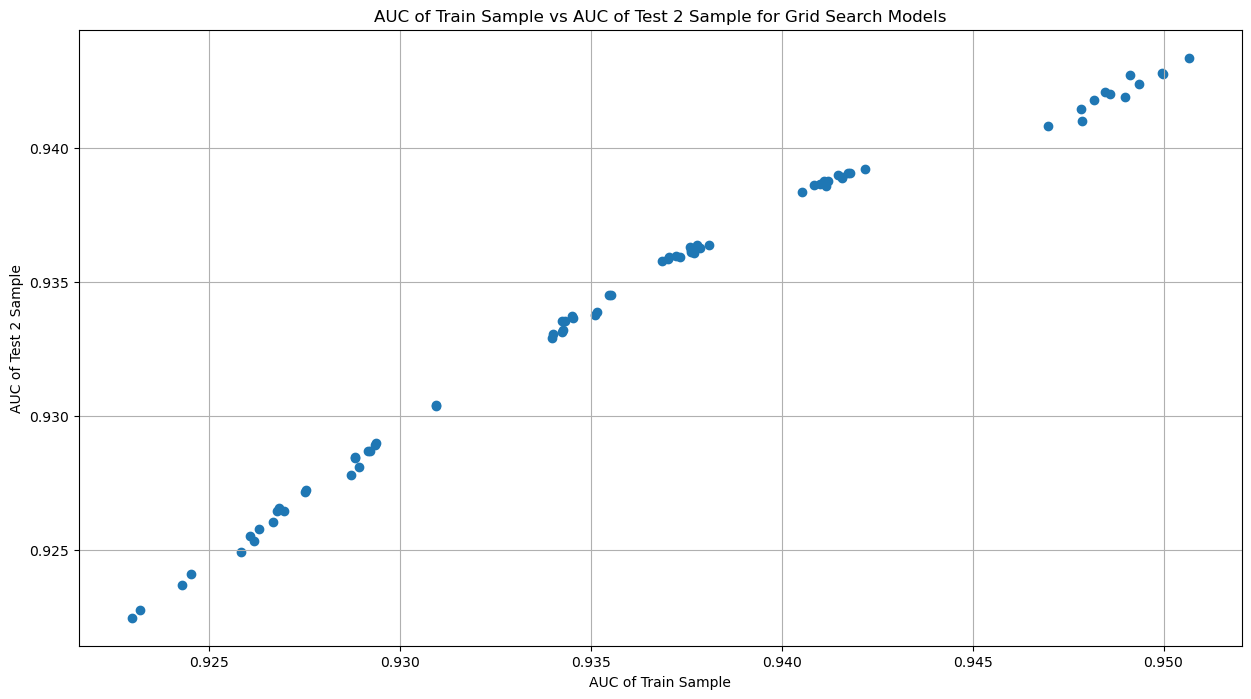

In [95]:
# Create scatter plot (AUC of train sample vs AUC of Test 2 sample)
plt.figure(figsize=(15, 8))
plt.scatter(table['AUC Train'], table['AUC Test2'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs AUC of Test 2 Sample for Grid Search Models')
plt.grid(True)
plt.show()

# SHAP (SHapley Additive exPlanations) 

In [125]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/39/6c/4ab39615fc3ffe40faaa62fc2feb43868b8ce946c671e84bf476c1e06116/shap-0.45.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.7 from https://files.pythonhosted.org/packages/78/c2/b3f55dfdb8af9812fdb9baf70cacf3b9e82e505b2bd4324d588888b81202/slicer-0.0.7-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/453.1 kB ? eta -:--:--
   ------- -------------------------------- 81.9/453.1 kB 2.3 MB/s eta 0:00:01
   ------------------------- -------------- 286.7/453.1 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 453.1/453.1 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [96]:
#Predicting and visualize feature
import shap
shap.initjs()

In [98]:
# Create the SHAP explainer
explainer = shap.Explainer(final_xgboost_model)

# Calculate SHAP values
calc_shap_values = explainer(X_test2)

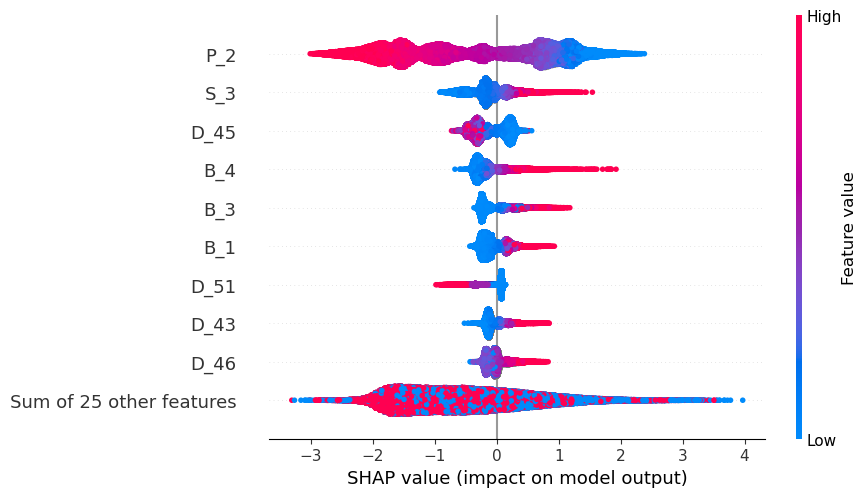

In [99]:
#plotting BEESWARM PLOT
shap.plots.beeswarm(calc_shap_values)

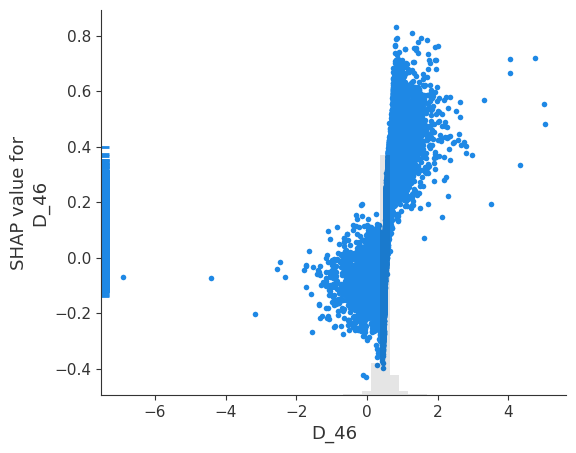

In [100]:
#Scatter plot
shap.plots.scatter(calc_shap_values[:,"D_46"])

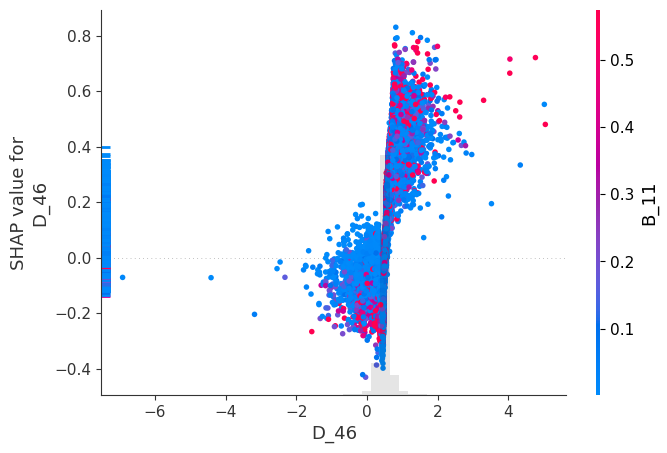

In [101]:
#Scatter plot
shap.plots.scatter(calc_shap_values[:,"D_46"], color=calc_shap_values[:,"B_11"])

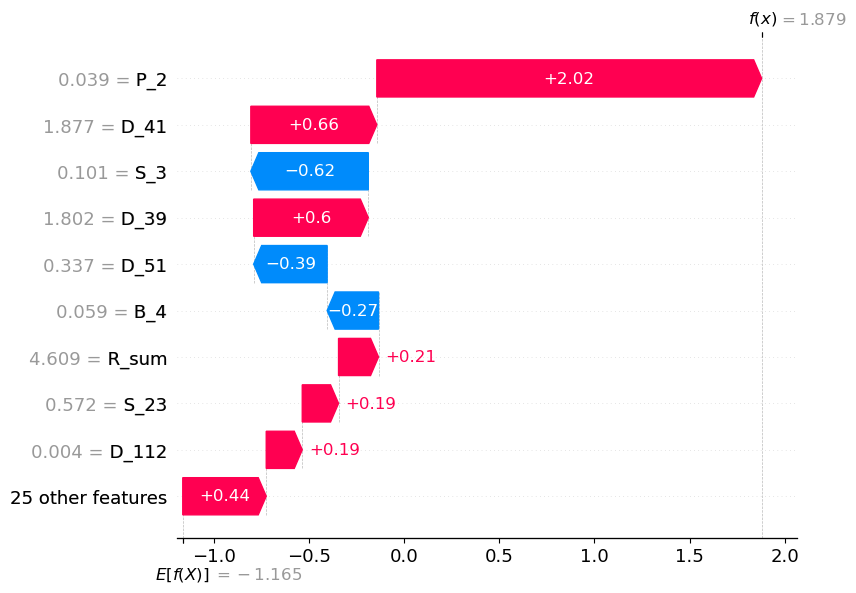

In [102]:
#Waterfall plot
shap.plots.waterfall(calc_shap_values[230])

# 13. Grid search for Neural Network

## outlier treatment and normalization

In [103]:
#Removing outlier
def remove_outliers_function(df, col_name):
    if df[col_name].dtype in ['int64', 'float64']:
        Q1 = df[col_name].quantile(0.25)
        Q3 = df[col_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        return df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    else:
        return df

#Filtering X TRAIN
filtered_X_train = X_train.copy()

for col in filtered_X_train.columns:
    filtered_X_train = remove_outliers_function(filtered_X_train, col)

filtered_X_train


,D_44,B_9,D_48,D_114_1.0,B_3,D_42,S_3,B_11,D_45,P_2,...,B_5,P_3,R_std,B_4,B_38_2.0,B_1,D_46,D_39,S_23,B_7
138272,0.000089,0.054490,0.538235,False,0.008500,0.069705,0.247229,0.012416,0.031847,0.730096,...,0.061803,0.434480,0.283578,0.081202,False,0.021214,0.535167,0.001223,0.137640,0.050822
993071,0.259124,0.021272,0.844298,True,0.002184,0.039601,0.155991,0.028065,0.004325,0.645265,...,0.001219,0.552309,0.274455,0.046060,False,0.052697,0.410677,0.009002,0.138441,0.067129
726060,0.259596,0.121381,0.592321,True,0.008836,0.185185,0.139411,0.002420,0.002777,0.271078,...,0.063018,0.616677,0.272558,0.249133,True,0.003665,0.404347,0.004368,0.132883,0.110718
38161,0.008046,0.003112,0.007036,True,0.004743,0.009472,0.331389,0.006363,0.032457,1.004344,...,0.003814,0.812678,0.271008,0.026226,True,0.003993,0.348240,0.003939,0.137393,0.032063
925281,0.003156,0.005917,0.315633,False,0.008850,0.055584,0.169707,0.003549,0.023591,0.545288,...,0.016835,0.572378,0.272280,0.170719,True,0.005399,0.620414,0.001800,0.139365,0.066612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514072,0.126357,0.206227,0.224251,False,0.006741,0.271251,0.161934,0.010448,0.012623,0.593619,...,0.037031,0.731210,0.272723,0.018098,True,0.025648,0.449691,0.002334,0.139523,0.025407
989336,0.259729,0.005173,0.290108,False,0.005917,0.010010,0.172858,0.001361,0.022064,0.705806,...,0.001477,0.529269,0.272337,0.226788,True,0.001144,0.651409,0.004936,0.135770,0.084526
8036,0.007802,0.034557,0.243906,False,0.046331,0.198288,0.167918,0.013201,0.017590,0.611249,...,0.008497,0.974318,0.274370,0.007710,False,0.025772,0.455575,0.001688,0.134430,0.023344
999430,0.005349,0.002918,0.529675,False,0.006921,0.068263,0.478037,0.003164,0.023212,0.411754,...,0.002803,0.624873,0.267334,0.184145,True,0.000389,0.411163,0.009898,0.136648,0.054519


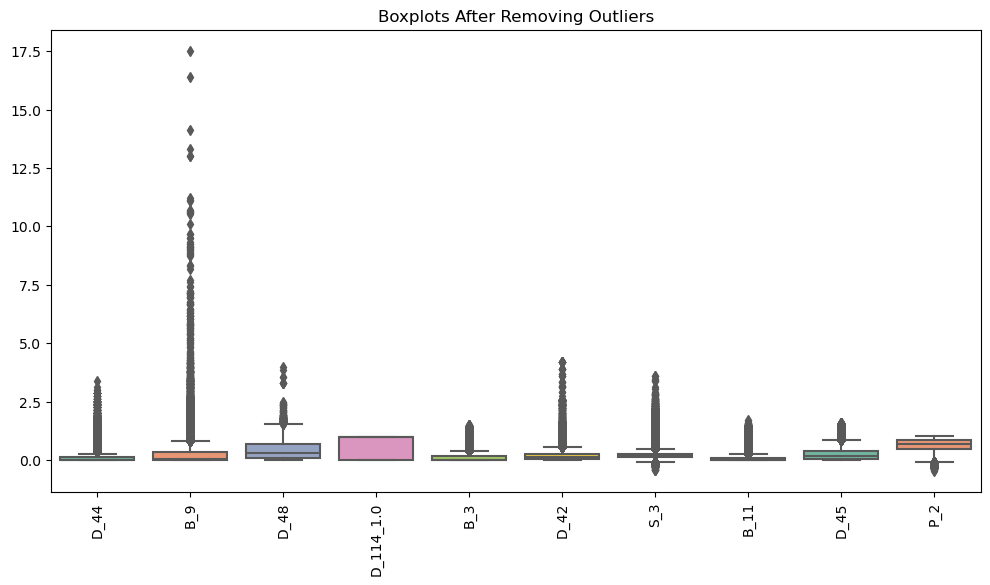

In [104]:
#Plotting graph
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train[X_train.columns[:10]], orient='v', palette='Set2')
plt.title('Boxplots After Removing Outliers')
plt.xticks(rotation=90)
plt.show()

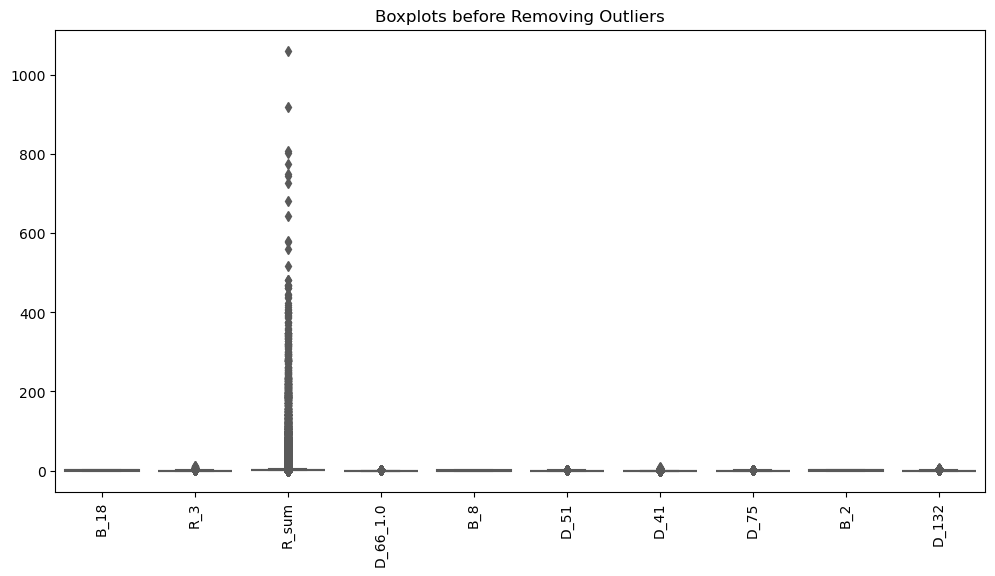

In [105]:
#Plotting graph
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train[X_train.columns[10:20]], orient='v', palette='Set2')
plt.title('Boxplots before Removing Outliers')
plt.xticks(rotation=90)
plt.show()

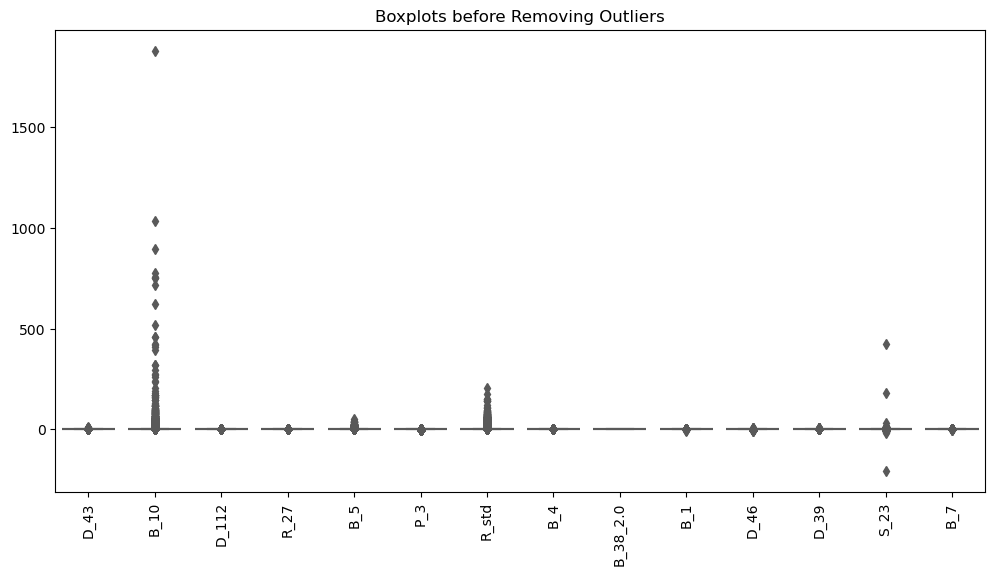

In [106]:
#Plotting graph
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train[X_train.columns[20:]], orient='v', palette='Set2')
plt.title('Boxplots before Removing Outliers')
plt.xticks(rotation=90)
plt.show()

In [108]:
#Checking if there are NULLs
X_train[X_train.isna().sum()[X_train.isna().sum()>0].index]

,D_44,D_48,B_3,D_42,S_3,D_45,P_2,B_8,D_41,B_2,D_132,D_43,D_112,R_27,P_3,D_46,S_23
863454,0.001334,0.093571,0.169616,NaN,0.188273,0.080861,0.824117,1.004140,0.008699,0.007577,NaN,0.016615,0.002522,1.008970,0.577478,NaN,0.134001
411011,0.001953,0.118679,0.001689,NaN,0.133136,0.403098,0.968088,0.002753,0.000275,1.008871,NaN,0.040776,1.002112,1.006050,0.679639,0.387308,0.131210
424957,NaN,NaN,0.012227,NaN,0.196823,0.955284,0.684565,0.009062,0.008410,1.007614,NaN,NaN,1.008412,1.004225,0.614290,NaN,0.134426
319767,0.000892,0.149046,0.010232,NaN,0.161030,0.061123,0.672909,1.006125,0.119013,1.002104,NaN,1.055507,0.012806,0.023418,0.679526,0.358604,0.132977
760937,0.132012,0.682824,0.314442,NaN,0.252357,0.029353,0.398512,1.005139,0.008286,0.004189,NaN,0.044920,1.000234,1.006189,0.637968,0.455309,0.131923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.006365,0.010997,0.009139,NaN,0.045882,0.314234,0.936303,0.005852,0.009168,0.814277,NaN,NaN,1.002898,1.000990,0.626444,NaN,0.131868
259178,NaN,NaN,0.384457,NaN,0.363297,0.736895,0.874915,0.005365,0.351622,0.116630,NaN,0.049715,0.004852,1.000479,0.636657,NaN,0.135741
131932,0.128802,0.404320,0.035346,0.0588,0.164757,0.021021,0.551723,1.001772,0.004447,0.100779,NaN,NaN,1.004138,0.022597,0.722658,NaN,0.131043
671155,NaN,NaN,0.000689,NaN,0.077312,0.042816,0.547956,1.000078,0.003806,1.002699,NaN,0.110198,1.006959,1.005613,0.630136,NaN,0.136489


In [109]:
#Scalling
#Mean=0 and SD=1
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.fit_transform(X_test1)
X_test2_scaled = scaler.fit_transform(X_test2)

In [110]:
#Checking for Null
pd.DataFrame(X_train_scaled).isna().sum()

0      38430
1          0
2     100162
3          0
4        275
5     663474
6     142091
7          0
8        275
9       6462
10         0
11         0
12         0
13         0
14      3175
15         0
16       275
17         0
18       275
19    698241
20    231521
21         0
22       363
23     17995
24         0
25     42386
26         0
27         0
28         0
29         0
30    168100
31         0
32        67
33         0
dtype: int64

In [111]:
#Replacing any missing values with 0
X_train_scaled = pd.DataFrame(X_train_scaled).fillna(0).values

In [112]:
#Replacing any missing values with 0
X_test1_scaled = pd.DataFrame(X_test1_scaled).fillna(0).values
X_test2_scaled = pd.DataFrame(X_test2_scaled).fillna(0).values

## Neural Network with Grid Search

In [113]:
#function provides a flexible way to create a sequential neural network 
#classifier with customizable architecture and parameters
def create_model(hidden_layers, num_nodes, activation_fn, dropout_rate):
    """
    create_model method creates a sequential classifier model with set no of hidden layers
    num_layers: [2, 4]
    num_nodes: [4, 6]
    activations: ['relu', 'tanh']
    dropout_rates: [0.5, 1.0]
    """
    classifier, optimizer = Sequential(), Adam()
    classifier.add(Dense(num_nodes, input_dim=X_train_scaled.shape[1], activation=activation_fn))

    for _ in range(0, hidden_layers - 1):
        classifier.add(Dense(num_nodes, activation=activation_fn))
        if dropout_rate < 1.0:
            classifier.add(Dropout(1-dropout_rate))

    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])
    return classifier

In [116]:
import warnings

In [117]:
# Filter out the specific UserWarning
warnings.filterwarnings("ignore", message="Do not pass an `input_shape`/`input_dim` argument to a layer.*")


In [118]:
results = list()

# neural network grid-search parameters
num_layers, num_nodes, activations, dropout_rates  = [2, 4], [4, 6], ['relu', 'tanh'], [0.5, 1.0]
batch_sizes, epochs = [100, 10000], 20

for layers in num_layers:
    for nodes in num_nodes:
        for activation in activations:
            for dropout_rate in dropout_rates:
                for batch_size in batch_sizes:
                    model = create_model(layers, nodes, activation, dropout_rate)
                    history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    train_proba = model.predict(X_train_scaled).ravel()
                    train_auc = roc_auc_score(y_train, train_proba)  # compute AUC for train set
                    
                    test1_proba = model.predict(X_test1_scaled).ravel()  # predict probabilities for test1
                    test1_auc = roc_auc_score(y_test1, test1_proba)  # compute AUC for test1

                    test2_proba = model.predict(X_test1_scaled).ravel()  # predict probabilities for test2
                    test2_auc = roc_auc_score(y_test2, test2_proba)   # compute AUC for test2

                    results.append({
                        'num_layers': layers, 'num_nodes': nodes,
                        'activation': activation, 'dropout_rate': dropout_rate,
                        'batch_size': batch_size, 'train_auc': train_auc,
                        'test1_auc': test1_auc, 'test2_auc': test2_auc
                        })

dataframe_results = pd.DataFrame(results)

24205/24205 ━━━━━━━━━━━━━━━━━━━━ 23s 934us/step
5187/5187 ━━━━━━━━━━━━━━━━━━━━ 5s 977us/step
5187/5187 ━━━━━━━━━━━━━━━━━━━━ 5s 911us/step
24205/24205 ━━━━━━━━━━━━━━━━━━━━ 22s 913us/step
5187/5187 ━━━━━━━━━━━━━━━━━━━━ 5s 914us/step
5187/5187 ━━━━━━━━━━━━━━━━━━━━ 5s 908us/step
24205/24205 ━━━━━━━━━━━━━━━━━━━━ 23s 929us/step
5187/5187 ━━━━━━━━━━━━━━━━━━━━ 5s 863us/step
5187/5187 ━━━━━━━━━━━━━━━━━━━━ 5s 923us/step
24205/24205 ━━━━━━━━━━━━━━━━━━━━ 23s 934us/step
5187/5187 ━━━━━━━━━━━━━━━━━━━━ 5s 980us/step
5187/5187 ━━━━━━━━━━━━━━━━━━━━ 5s 889us/step
24205/24205 ━━━━━━━━━━━━━━━━━━━━ 23s 967us/step
5187/5187 ━━━━━━━━━━━━━━━━━━━━ 5s 970us/step
5187/5187 ━━━━━━━━━━━━━━━━━━━━ 5s 864us/step
24205/24205 ━━━━━━━━━━━━━━━━━━━━ 23s 939us/step
5187/5187 ━━━━━━━━━━━━━━━━━━━━ 5s 874us/step
5187/5187 ━━━━━━━━━━━━━━━━━━━━ 5s 876us/step
24205/24205 ━━━━━━━━━━━━━━━━━━━━ 23s 942us/step
5187/5187 ━━━━━━━━━━━━━━━━━━━━ 5s 932us/step
5187/5187 ━━━━━━━━━━━━━━━━━━━━ 5s 950us/step
24205/24205 ━━━━━━━━━━━━━━━━━━━━ 2

In [119]:
df_results = pd.DataFrame(results)
df_results

,num_layers,num_nodes,activation,dropout_rate,batch_size,train_auc,test1_auc,test2_auc
0,2,4,relu,0.5,100,0.932528,0.931914,0.500181
1,2,4,relu,0.5,10000,0.930668,0.930263,0.500086
2,2,4,relu,1.0,100,0.932900,0.932349,0.500127
3,2,4,relu,1.0,10000,0.925590,0.925117,0.500225
4,2,4,tanh,0.5,100,0.932360,0.931826,0.499988
5,2,4,tanh,0.5,10000,0.930097,0.929536,0.500123
6,2,4,tanh,1.0,100,0.932494,0.931879,0.499795
7,2,4,tanh,1.0,10000,0.930262,0.929992,0.499857
8,2,6,relu,0.5,100,0.932756,0.932097,0.499994
9,2,6,relu,0.5,10000,0.930594,0.930253,0.499944


In [120]:
# From the above table we can see that the model at index 12 is the best performing 
# model and also not that complex as there are only 2 hidden layers.
# num_layers	num_nodes	activation	dropout_rate	batch_size	train_auc	test1_auc	test2_au
# 2	               6	     tanh	       0.5	           100	      0.930243	0.927316	0.500765

In [121]:
#trains a neural network model
final_nn_model, optimizer = Sequential(), Adam()
final_nn_model.add(Dense(6, input_dim=X_train_scaled.shape[1], activation='relu'))
final_nn_model.add(Dense(1, activation='sigmoid'))
final_nn_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])
final_nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=100, verbose=1)
final_nn_model.save('save_selected_model.h5')

Epoch 1/20
7746/7746 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - AUC: 0.9109 - loss: 0.3159
Epoch 2/20
7746/7746 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - AUC: 0.9309 - loss: 0.2838
Epoch 3/20
7746/7746 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - AUC: 0.9315 - loss: 0.2829
Epoch 4/20
7746/7746 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - AUC: 0.9318 - loss: 0.2825
Epoch 5/20
7746/7746 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - AUC: 0.9320 - loss: 0.2822
Epoch 6/20
7746/7746 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - AUC: 0.9323 - loss: 0.2815
Epoch 7/20
7746/7746 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - AUC: 0.9323 - loss: 0.2812
Epoch 8/20
7746/7746 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - AUC: 0.9326 - loss: 0.2812
Epoch 9/20
7746/7746 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - AUC: 0.9320 - loss: 0.2820
Epoch 10/20
7746/7746 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - AUC: 0.9323 - loss: 0.2809
Epoch 11/20
7746/7746 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - AUC: 0.9318 - loss: 0.2824
Epoch 12/20
7746/7746 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - AUC: 0.9316 - lo

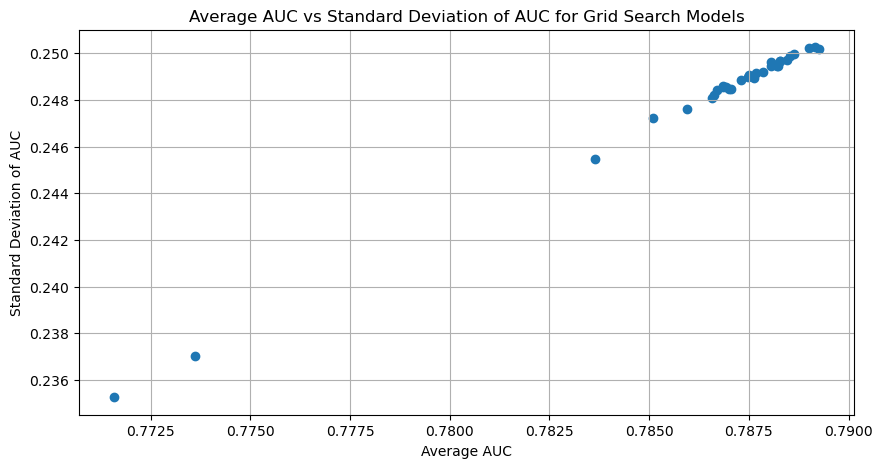

In [122]:
#Plotting a graph
df_results['Average AUC'] = df_results[['train_auc', 'test1_auc', 'test2_auc']].mean(axis=1)
df_results['Standard Deviation AUC'] = df_results[['train_auc', 'test1_auc', 'test2_auc']].std(axis=1)
plt.figure(figsize=(10, 5))
plt.scatter(df_results['Average AUC'], df_results['Standard Deviation AUC'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs Standard Deviation of AUC for Grid Search Models')
plt.grid(True)
plt.show()

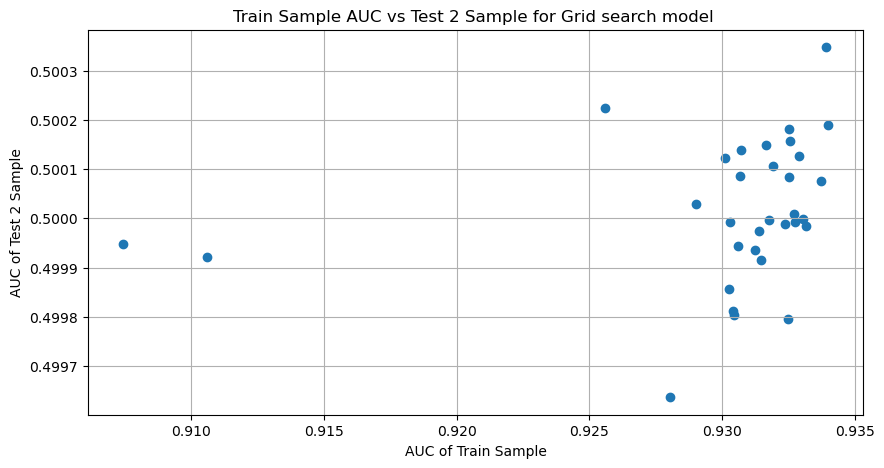

In [123]:
# Create scatter plot (AUC of train sample vs AUC of Test 2 sample)
plt.figure(figsize=(10, 5))
plt.scatter(df_results['train_auc'], df_results['test2_auc'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('Train Sample AUC vs Test 2 Sample for Grid search model ')
plt.grid(True)
plt.show()

In [124]:
#Predicting the bad rate for each score bin on TRAINING DATSET

y_pred = pd.DataFrame({"Actual": y_train, 
                       "Prediction": [i[0] for i in final_nn_model.predict(X_train_scaled)]})
quantiles = list(set(y_pred.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)
y_pred["Score Bins"] = pd.cut(y_pred["Prediction"], quantiles)
statistics = y_pred.groupby("Score Bins")["Actual"].agg(["sum", "count"])
statistics["Bad Rate"] = statistics["sum"] / statistics["count"]
statistics.reset_index(inplace=True)
statistics

24205/24205 ━━━━━━━━━━━━━━━━━━━━ 22s 909us/step


C:\Users\anxiousviking\AppData\Local\Temp\ipykernel_67340\3502747866.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  statistics = y_pred.groupby("Score Bins")["Actual"].agg(["sum", "count"])


,Score Bins,sum,count,Bad Rate
0,"(0.0, 0.0018]",124,77454,0.001601
1,"(0.0018, 0.00368]",253,77455,0.003266
2,"(0.00368, 0.00759]",392,77455,0.005061
3,"(0.00759, 0.0183]",1015,77455,0.013104
4,"(0.0183, 0.0545]",2506,77455,0.032354
5,"(0.0545, 0.158]",7667,77454,0.098988
6,"(0.158, 0.361]",20770,77455,0.268156
7,"(0.361, 0.592]",38189,77455,0.493048
8,"(0.592, 0.789]",53942,77455,0.696430
9,"(0.789, 1.0]",68133,77455,0.879646


In [125]:
#Predicting the bad rate for each score bin on TEST 1 DATSET

y_test1_pred = pd.DataFrame({"Actual": y_test1, 
                             "Prediction": [i[0] for i in final_nn_model.predict(X_test1_scaled)]})
quantiles = list(set(y_test1_pred.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)
y_test1_pred["Score Bins"] = pd.cut(y_test1_pred["Prediction"], quantiles)
statistics1 = y_test1_pred.groupby("Score Bins")["Actual"].agg(["sum", "count"])
statistics1["Bad Rate"] = statistics1["sum"] / statistics1["count"]
statistics1.reset_index(inplace=True)
statistics1

5187/5187 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


C:\Users\anxiousviking\AppData\Local\Temp\ipykernel_67340\1598083325.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  statistics1 = y_test1_pred.groupby("Score Bins")["Actual"].agg(["sum", "count"])


,Score Bins,sum,count,Bad Rate
0,"(0.0, 0.00173]",19,16598,0.001145
1,"(0.00173, 0.00357]",47,16597,0.002832
2,"(0.00357, 0.00742]",65,16598,0.003916
3,"(0.00742, 0.018]",237,16597,0.014280
4,"(0.018, 0.0533]",557,16598,0.033558
5,"(0.0533, 0.155]",1656,16597,0.099777
6,"(0.155, 0.359]",4353,16597,0.262276
7,"(0.359, 0.592]",8160,16598,0.491625
8,"(0.592, 0.791]",11540,16597,0.695306
9,"(0.791, 1.0]",14514,16598,0.874443


In [126]:
#Predicting the bad rate for each score bin on TEST 2 DATSET

y_test2_pred = pd.DataFrame({"Actual": y_test2, 
                             "Prediction": [i[0] for i in final_nn_model.predict(X_test2_scaled)]})
quantiles = list(set(y_test2_pred.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)
y_test2_pred["Score Bins"] = pd.cut(y_test2_pred["Prediction"], quantiles)
statistics2 = y_test2_pred.groupby("Score Bins")["Actual"].agg(["sum", "count"])
statistics2["Bad Rate"] = statistics2["sum"] / statistics2["count"]
statistics2.reset_index(inplace=True)
statistics2

5187/5187 ━━━━━━━━━━━━━━━━━━━━ 5s 905us/step


C:\Users\anxiousviking\AppData\Local\Temp\ipykernel_67340\3346070719.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  statistics2 = y_test2_pred.groupby("Score Bins")["Actual"].agg(["sum", "count"])


,Score Bins,sum,count,Bad Rate
0,"(0.0, 0.00186]",25,16598,0.001506
1,"(0.00186, 0.00381]",46,16597,0.002772
2,"(0.00381, 0.00782]",89,16598,0.005362
3,"(0.00782, 0.0189]",211,16597,0.012713
4,"(0.0189, 0.0555]",557,16598,0.033558
5,"(0.0555, 0.159]",1642,16597,0.098934
6,"(0.159, 0.361]",4305,16597,0.259384
7,"(0.361, 0.591]",8088,16598,0.487288
8,"(0.591, 0.786]",11662,16597,0.702657
9,"(0.786, 1.0]",14534,16598,0.875648


C:\Users\anxiousviking\AppData\Local\Temp\ipykernel_67340\2492898693.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(combined_df.index)


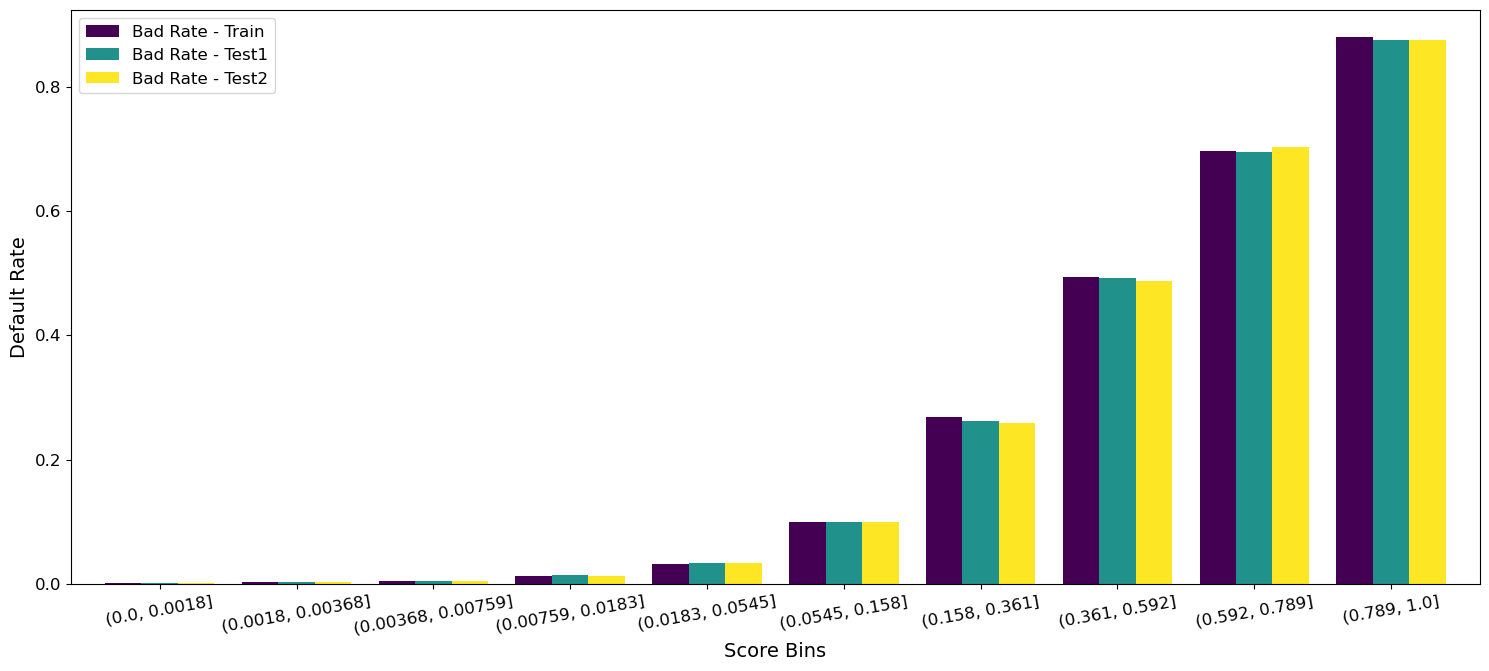

In [127]:
#Bar plot visualizing the bad rate scross different score bins

dfs = [statistics, statistics1, statistics2]
bad_scores = [df["Bad Rate"] for df in dfs]
combined_df = pd.concat(bad_scores, axis=1)
combined_df.index = statistics['Score Bins']
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xticklabels(combined_df.index)
combined_df.plot(kind='bar', ax=ax, colormap='viridis', width=0.8)
plt.xlabel('Score Bins', fontsize=14)
plt.ylabel('Default Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Bad Rate - Train', 'Bad Rate - Test1', 'Bad Rate - Test2'], fontsize=12)
plt.tight_layout()
plt.xticks(rotation=10)
plt.show()

In [128]:
#estimate the performance of a portfolio based on a given threshold for an output variable

def estimate_portfolio(final_data, target, output, balance_col, spend_col, threshold): 
    final_data['accept'] = (final_data[output] < threshold).astype(int)
    final_data['revenue'] = (final_data[balance_co1]*0.02 + final_data['spend_col']*0.001) * 12
    df_accepted = final_data[final_data['accept']==1]
    exp_default_rate = df_accepted[target].sum() / df_accepted.shape[0]
    exp_revenue = (df_accepted.groupby(target).sum()[['revenue']])['revenue'][0]
    return exp_default_rate, exp_revenue, df_accepted. shape[0]

In [129]:
#assessing the performance of a portfolio
#such as a loan portfolio, based on certain criteria and thresholds

def calculate_metrics(final_data, threshold):
    accepted_customers = final_data[final_data["predicted_default"] < threshold].copy()
    portfolio_default_rate = accepted_customers['target'].mean()
    accepted_customers["Monthly_Revenue"] = accepted_customers["B_1"]*0.02 + accepted_customers["S_3"]*0.001
    portfolio_expected_revenue = (accepted_customers[accepted_customers["target"] == 0]["Monthly_Revenue"] * 12).sum()
    return portfolio_default_rate, portfolio_expected_revenue

In [131]:
#performance of the XGBoost model at different threshold levels 

X3_test2 = X_train[final_features]
predicted_default_test2 = final_xgboost_model.predict_proba(X3_test2)[:, 1]
X3_test2['predicted_default'] = predicted_default_test2
final_data["predicted_default"] = final_xgboost_model.predict_proba(final_data[final_features])[:, 1]
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.575, 0.585, 0.6,0.7,0.8,0.9]:
    print(f"Threshold: {threshold}")
    default_rate, expected_revenue = calculate_metrics(final_data, threshold)
    print(f"Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

Threshold: 0.1
Default Rate: 0.01577126299915222, Expected Revenue: 5247.005749061305
Threshold: 0.2
Default Rate: 0.028401275365498448, Expected Revenue: 7081.7558239220425
Threshold: 0.3
Default Rate: 0.04284496951568371, Expected Revenue: 8692.780836387828
Threshold: 0.4
Default Rate: 0.05984699164854815, Expected Revenue: 10151.687731576489
Threshold: 0.5
Default Rate: 0.08074191637701827, Expected Revenue: 11519.87522612865
Threshold: 0.55
Default Rate: 0.09250196412203746, Expected Revenue: 12176.13051447149
Threshold: 0.575
Default Rate: 0.09905333028997236, Expected Revenue: 12495.346755040033
Threshold: 0.585
Default Rate: 0.10183654897502138, Expected Revenue: 12619.032218190956
Threshold: 0.6
Default Rate: 0.1060593836185394, Expected Revenue: 12800.343179745245
Threshold: 0.7
Default Rate: 0.13735532407407408, Expected Revenue: 13917.678165460233
Threshold: 0.8
Default Rate: 0.17521544284663326, Expected Revenue: 14863.199329430485
Threshold: 0.9
Default Rate: 0.21735710663

In [133]:
#predicts default probabilities for X_test1 using the final_xgboost_model

X3_test2 = X_test1[final_features]
predicted_default_test2 = final_xgboost_model.predict_proba(X3_test2)[:, 1]
X3_test2['predicted_default'] = predicted_default_test2
final_data["predicted_default"] = final_xgboost_model.predict_proba(final_data[final_features])[:, 1]
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.575, 0.585, 0.6, 0.7, 0.8, 0.9]:
    print(f"Threshold: {threshold}")
    default_rate, expected_revenue = calculate_metrics(final_data, threshold)
    print(f"Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")


Threshold: 0.1
Default Rate: 0.01577126299915222, Expected Revenue: 5247.005749061305
Threshold: 0.2
Default Rate: 0.028401275365498448, Expected Revenue: 7081.7558239220425
Threshold: 0.3
Default Rate: 0.04284496951568371, Expected Revenue: 8692.780836387828
Threshold: 0.4
Default Rate: 0.05984699164854815, Expected Revenue: 10151.687731576489
Threshold: 0.5
Default Rate: 0.08074191637701827, Expected Revenue: 11519.87522612865
Threshold: 0.55
Default Rate: 0.09250196412203746, Expected Revenue: 12176.13051447149
Threshold: 0.575
Default Rate: 0.09905333028997236, Expected Revenue: 12495.346755040033
Threshold: 0.585
Default Rate: 0.10183654897502138, Expected Revenue: 12619.032218190956
Threshold: 0.6
Default Rate: 0.1060593836185394, Expected Revenue: 12800.343179745245
Threshold: 0.7
Default Rate: 0.13735532407407408, Expected Revenue: 13917.678165460233
Threshold: 0.8
Default Rate: 0.17521544284663326, Expected Revenue: 14863.199329430485
Threshold: 0.9
Default Rate: 0.21735710663

In [135]:
#Performance of the XGBoost model at different threshold levels using the X_test2 dataset 

X3_test2 = X_test2[final_features]
predicted_default_test2 = final_xgboost_model.predict_proba(X3_test2)[:, 1]
X3_test2['predicted_default'] = predicted_default_test2
final_data["predicted_default"] = final_xgboost_model.predict_proba(final_data[final_features])[:, 1]
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.575, 0.585, 0.6, 0.7, 0.8, 0.9]:
    print(f"Threshold: {threshold}")
    default_rate, expected_revenue = calculate_metrics(final_data, threshold)
    print(f"Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")


Threshold: 0.1
Default Rate: 0.01577126299915222, Expected Revenue: 5247.005749061305
Threshold: 0.2
Default Rate: 0.028401275365498448, Expected Revenue: 7081.7558239220425
Threshold: 0.3
Default Rate: 0.04284496951568371, Expected Revenue: 8692.780836387828
Threshold: 0.4
Default Rate: 0.05984699164854815, Expected Revenue: 10151.687731576489
Threshold: 0.5
Default Rate: 0.08074191637701827, Expected Revenue: 11519.87522612865
Threshold: 0.55
Default Rate: 0.09250196412203746, Expected Revenue: 12176.13051447149
Threshold: 0.575
Default Rate: 0.09905333028997236, Expected Revenue: 12495.346755040033
Threshold: 0.585
Default Rate: 0.10183654897502138, Expected Revenue: 12619.032218190956
Threshold: 0.6
Default Rate: 0.1060593836185394, Expected Revenue: 12800.343179745245
Threshold: 0.7
Default Rate: 0.13735532407407408, Expected Revenue: 13917.678165460233
Threshold: 0.8
Default Rate: 0.17521544284663326, Expected Revenue: 14863.199329430485
Threshold: 0.9
Default Rate: 0.21735710663